<a href="https://colab.research.google.com/github/M-Woi/pl13-demo/blob/main/brain_tumor_classification_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GIT: https://github.com/M-Woi/Group-Projects.git
Authors: Michał Golberg, Michał Wiśniowski

Research Question: "How can convolutional neural networks (CNNs) be leveraged to improve the identification and classification of brain tumors in CT scan images, with a focus on the four categories of 'glioma_tumor', 'pituitary_tumor', 'no_tumor', and 'meningioma_tumor'? This research seeks to explore and compare the performance of different CNN models in order to advance the accuracy and effectiveness of brain tumor diagnosis from medical imaging."


Introduction:
Computed Tomography (CT) scans play a crucial role in the diagnosis of brain tumors. They offer a non-invasive means of capturing detailed cross-sectional images of the human brain, providing valuable insights to medical practitioners. Brain tumors are a diverse group of pathologies with a wide range of clinical implications, making their accurate and timely identification essential for patient care.

Over the years, the field of medical imaging has witnessed significant advancements, and the integration of artificial intelligence (AI) techniques has been transformative. In particular, Convolutional Neural Networks (CNNs) have emerged as a powerful tool for image classification and object recognition. CNNs are inherently suited to the task of identifying patterns and features within medical images, making them a prime candidate for improving the diagnostic accuracy of brain tumors.

The objective of this research is to investigate the application of CNNs in the context of CT scan images for brain tumor classification. The research will focus on four primary categories: 'glioma_tumor', 'pituitary_tumor', cases with 'no_tumor' detected, and 'meningioma_tumor'. These categories encompass a spectrum of brain pathologies, each with its own distinct features and implications.

Through this research, we aim to address critical questions regarding the implementation of CNN models for the accurate and efficient diagnosis of brain tumors in CT scan images. The primary research question explores the performance and efficacy of different CNN architectures when applied to the specific task of classifying these brain tumors. By evaluating and comparing these models using relevant performance metrics, the study intends to provide valuable insights that can guide the selection of the most suitable CNN model for this medical application.

This research is motivated by the overarching goal of improving the diagnostic accuracy, speed, and overall patient care in the field of radiology. The outcomes of this study have the potential to significantly impact clinical practice and the lives of individuals by enhancing the detection and classification of brain tumors from CT scans.


Hypothesis:

Null Hypotheses (H0): There is no significant difference in the accuracy and mean squared error (MSE) between models A, E, and F when classifying CT scan images of brain tumors into the categories 'glioma_tumor', 'pituitary_tumor', 'no_tumor', and 'meningioma_tumor'.

Alternate Hypotheses (H1):

    H0 for Accuracy: There is a significant difference in the accuracy between models A, E, and F when classifying CT scan images of brain tumors.

    H0 for MSE: There is a significant difference in the mean squared error (MSE) between models A, E, and F when classifying CT scan images of brain tumors.

Additional Alternate Hypotheses (H1):

    For Accuracy:
        H1A: Model A has the highest accuracy among the three models in classifying CT scan images of brain tumors.
        H1B: Model E has the highest accuracy among the three models in classifying CT scan images of brain tumors.
        H1C: Model F has the highest accuracy among the three models in classifying CT scan images of brain tumors.

    For MSE:
        H1M: Model A has the lowest mean squared error (MSE) among the three models in classifying CT scan images of brain tumors.
        H1N: Model E has the lowest mean squared error (MSE) among the three models in classifying CT scan images of brain tumors.
        H1O: Model F has the lowest mean squared error (MSE) among the three models in classifying CT scan images of brain tumors.

These hypotheses aim to compare the performance of models A, E, and F in classifying CT scan images of brain tumors based on accuracy and mean squared error. The null hypotheses state that there are no significant differences, while the alternate hypotheses explore potential differences and identify which model performs the best in terms of accuracy and MSE. The analysis will help determine which model is most effective in this classification task.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikeras
!pip install visualkeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 18.4 MB/s eta 0:00:00


In [ ]:
# !pip install pillow

In [ ]:
#pip install --upgrade joblib

In [ ]:
import os
import io
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from IPython.display import display
import visualkeras

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier
from tqdm import tqdm
from PIL import Image

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


##NEW

In [ ]:
classes = os.listdir("/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Training")
print(classes)

['glioma_tumor', 'pituitary_tumor', 'no_tumor', 'meningioma_tumor']


In [ ]:
# Define a function to load images and labels from a directory
def load_images_from_directory(directory, image_size):
    X = []  # List to store images
    y = []  # List to store labels

    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        class_images = sorted(os.listdir(class_dir))  # Sort the images alphabetically

        for image_name in tqdm(class_images):
            img = cv2.imread(os.path.join(class_dir, image_name))
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(class_name)

    return X, y

In [ ]:
# Define the desired image size
image_size = 150

# Specify the paths to training and testing directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Training'
test_dir = '/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Testing'

# Load images and labels from the training and testing directories
X_train, y_train = load_images_from_directory(train_dir, image_size)
X_test, y_test = load_images_from_directory(test_dir, image_size)

# Combine the data from both training and testing sets if needed
X = X_train + X_test
y = y_train + y_test

100%|██████████| 100/100 [00:00<00:00, 183.74it/s]


In [ ]:
# Convert the lists of images and labels to NumPy arrays for further processing
X = np.array(X)
y = np.array(y)

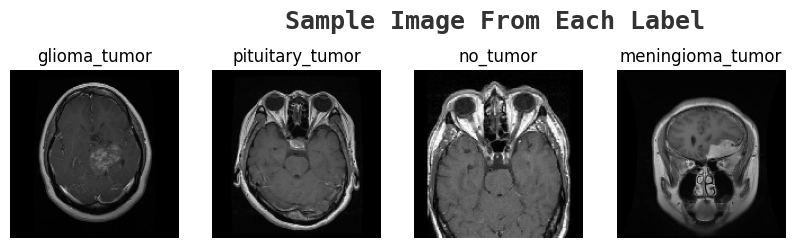

In [ ]:
# Initialize the variable k to 0
k = 0

# Create a subplot with 1 row and 4 columns and specify the figure size
fig, ax = plt.subplots(1, 4, figsize=(10, 10))

# Add a text annotation to the figure to provide a title
fig.text(s='Sample Image From Each Label', size=18, fontweight='bold',
         fontname='monospace', y=0.62, x=0.4, alpha=0.8)

# Iterate through each class (label) in the 'classes' list
for i in classes:
    j = 0  # Initialize a counter variable for iterating through images

    # Start an infinite loop to find an image with the current class label
    while True:
        # Check if the label of the j-th image matches the current class 'i'
        if y[j] == i:
            # Display the image at index 'j' in the k-th subplot
            ax[k].imshow(X[j])
            ax[k].set_title(y[j])  # Set the title of the subplot to the class label
            ax[k].axis('off')  # Turn off the axis for the subplot
            k += 1  # Increment the subplot index 'k'
            break  # Exit the loop when an image of the current class is found
        j += 1  # Move to the next image if the label doesn't match

# The code will continue to fill subplots until four images from different classes are displayed.


In [ ]:
# Split the data while maintaining class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
# Initialize empty lists to store the new labels
y_train_temp = []

# Iterate through each label in y_train
for i in y_train:
    # Find the index of the current label (class) in the 'classes' list
    index = classes.index(i)
    # Append the index (as an integer) to the 'y_train_temp' list
    y_train_temp.append(index)

# Update the 'y_train variable to use the new labels
y_train = y_train_temp
# Convert the integer-encoded labels in 'y_train to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(classes))


In [ ]:
# Initialize an empty list to store the new labels for y_test
y_test_temp = []

# Iterate through each label in y_test
for i in y_test:
    # Find the index of the current label (class) in the 'classes' list
    index = classes.index(i)
    # Append the index (as an integer) to the 'y_test_new' list
    y_test_temp.append(index)

# Update the 'y_test' variable to use the new labels
y_test = y_test_temp
y_test = tf.keras.utils.to_categorical(y_test)

###Model A

In [ ]:
model_A = Sequential()

model_A.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 3)))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())
model_A.add(MaxPooling2D(pool_size=(2, 2)))
model_A.add(Dropout(0.25))

model_A.add(Conv2D(64, (3, 3), padding='same'))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())
model_A.add(MaxPooling2D(pool_size=(2, 2)))
model_A.add(Dropout(0.25))

model_A.add(Flatten())
model_A.add(Dense(128, activation='relu'))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.5))
model_A.add(Dense(4, activation='softmax'))

In [ ]:
from tensorflow.keras.metrics import MeanSquaredError, AUC, Precision, Recall, F1Score

additional_metrics = [
    MeanSquaredError(),  # Mean Squared Error
]

# Define an optimizer and compile the model
model_A.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] + additional_metrics) #SparseCategoricalCrossentropy #categorical_crossentropy

# Define callbacks
early_stopping_A = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint_A = ModelCheckpoint('best_model_A.keras', monitor='val_accuracy', save_best_only=False) #to h5file/kerasfile


# Train the model
history_A = model_A.fit(X_train, y_train, validation_split=0.33, epochs=24, verbose=1, batch_size=12,
                                  callbacks=[early_stopping_A, model_checkpoint_A])

Epoch 1/24
122/122 [==============================] - 6s 33ms/step - loss: 1.3020 - accuracy: 0.5669 - mean_squared_error: 0.1528 - val_loss: 1.4550 - val_accuracy: 0.5499 - val_mean_squared_error: 0.1763
Epoch 2/24
122/122 [==============================] - 4s 33ms/step - loss: 0.7683 - accuracy: 0.7206 - mean_squared_error: 0.1020 - val_loss: 0.7224 - val_accuracy: 0.7271 - val_mean_squared_error: 0.0971
Epoch 3/24
122/122 [==============================] - 4s 29ms/step - loss: 0.6192 - accuracy: 0.7807 - mean_squared_error: 0.0821 - val_loss: 2.3061 - val_accuracy: 0.5000 - val_mean_squared_error: 0.1809
Epoch 4/24
122/122 [==============================] - 6s 47ms/step - loss: 0.4982 - accuracy: 0.8169 - mean_squared_error: 0.0674 - val_loss: 0.6118 - val_accuracy: 0.7978 - val_mean_squared_error: 0.0769
Epoch 5/24
122/122 [==============================] - 5s 38ms/step - loss: 0.3841 - accuracy: 0.8668 - mean_squared_error: 0.0505 - val_loss: 0.5922 - val_accuracy: 0.7867 - val_me

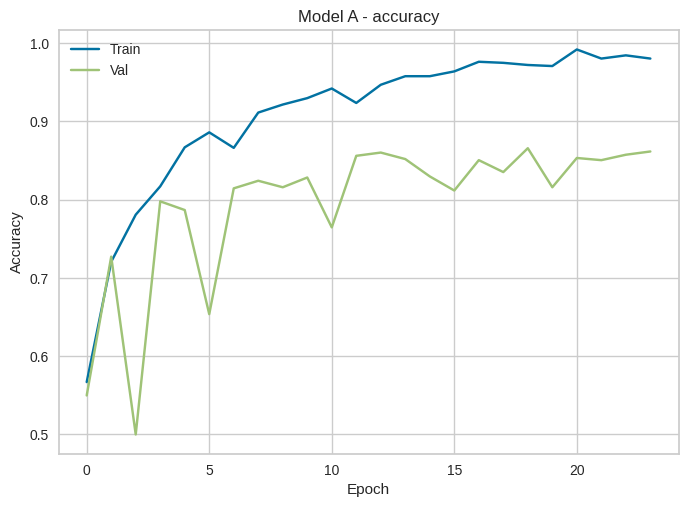

In [ ]:
plt.plot(history_A.history['accuracy'])
plt.plot(history_A.history['val_accuracy'])
plt.title('Model A - accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

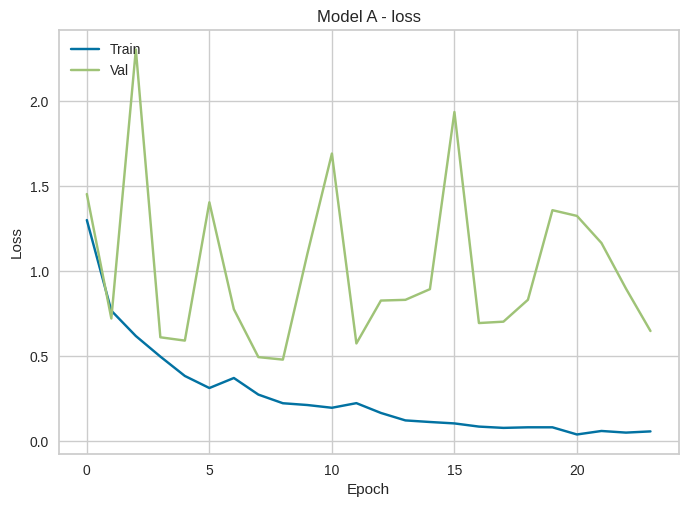

In [ ]:
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.title('Model A - loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

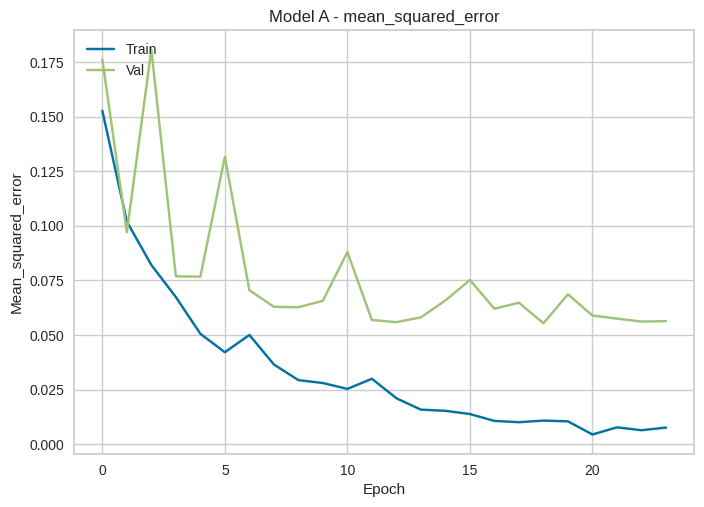

In [ ]:
plt.plot(history_A.history['mean_squared_error'])
plt.plot(history_A.history['val_mean_squared_error'])
plt.title('Model A - mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_pred_A = model_A.predict(X_test, verbose=1, batch_size=32)

34/34 [==============================] - 0s 7ms/step


<Axes: >

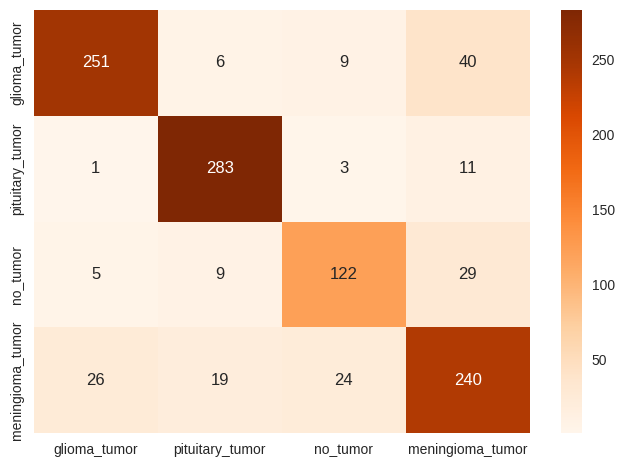

In [ ]:
CX_A =confusion_matrix(y_test.argmax(axis=1), y_pred_A.argmax(axis=1))
sns.heatmap(CX_A,annot=True, fmt=".0f", cmap='Oranges', xticklabels = classes, yticklabels = classes)


In [ ]:
eval_A = model_A.evaluate(
    x=X_test,
    y=y_test,
    batch_size=32,
    verbose=1,
    return_dict =True)

34/34 [==============================] - 0s 10ms/step - loss: 0.7207 - accuracy: 0.8312 - mean_squared_error: 0.0675


In [ ]:
eval_A = pd.Series(eval_A)
eval_A

loss                  0.720728
accuracy              0.831169
mean_squared_error    0.067457
dtype: float64

###Model E

In [ ]:
img_datagen_E = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen_E.fit(X_train)
img_datagen_E.fit(X_test)

In [ ]:
# Create a generator for training data
train_data_generator = img_datagen_E.flow(X_train, y_train, batch_size=32)

In [ ]:
model_E = Sequential()

model_E.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3)))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Conv2D(64, (3, 3)))
model_E.add(Activation('relu'))
model_E.add(MaxPooling2D(pool_size=(2, 2)))
model_E.add(BatchNormalization())
model_E.add(Dropout(0.33))

model_E.add(Conv2D(64, (3, 3), padding='same'))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Conv2D(64, (3, 3)))
model_E.add(Activation('relu'))
model_E.add(MaxPooling2D(pool_size=(2, 2)))
model_E.add(BatchNormalization())
model_E.add(Dropout(0.33))

model_E.add(Conv2D(64, (3, 3), padding='same'))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Flatten())
model_E.add(Dropout(0.5))
model_E.add(Dense(512))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())
model_E.add(Dense(4))
model_E.add(Activation('softmax'))

#model_E.summary()

In [ ]:
from tensorflow.keras.metrics import MeanSquaredError, AUC, Precision, Recall, F1Score

# Specify the additional metrics
additional_metrics = [
    MeanSquaredError(),  # Mean Squared Error
]

# Define an optimizer and compile the model
model_E.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] + additional_metrics)

# Define callbacks
early_stopping_E = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint_E = ModelCheckpoint('best_model_E.keras', monitor='val_accuracy', save_best_only=False) #to h5file/keras

In [ ]:
# Train the model
history_E = model_E.fit(X_train, y_train, validation_split=0.33, epochs=24, verbose=1, batch_size=12,
                                  callbacks=[early_stopping_E, model_checkpoint_E])

Epoch 1/24
122/122 [==============================] - 21s 125ms/step - loss: 1.3358 - accuracy: 0.6168 - mean_squared_error: 0.1400 - val_loss: 4.4016 - val_accuracy: 0.3144 - val_mean_squared_error: 0.2943
Epoch 2/24
122/122 [==============================] - 13s 109ms/step - loss: 0.6619 - accuracy: 0.7520 - mean_squared_error: 0.0878 - val_loss: 1.8613 - val_accuracy: 0.5623 - val_mean_squared_error: 0.1738
Epoch 3/24
122/122 [==============================] - 18s 147ms/step - loss: 0.5369 - accuracy: 0.7848 - mean_squared_error: 0.0751 - val_loss: 0.9801 - val_accuracy: 0.6953 - val_mean_squared_error: 0.1158
Epoch 4/24
122/122 [==============================] - 17s 140ms/step - loss: 0.4455 - accuracy: 0.8449 - mean_squared_error: 0.0595 - val_loss: 1.3331 - val_accuracy: 0.5332 - val_mean_squared_error: 0.1667
Epoch 5/24
122/122 [==============================] - 15s 126ms/step - loss: 0.3404 - accuracy: 0.8743 - mean_squared_error: 0.0467 - val_loss: 0.8565 - val_accuracy: 0.764

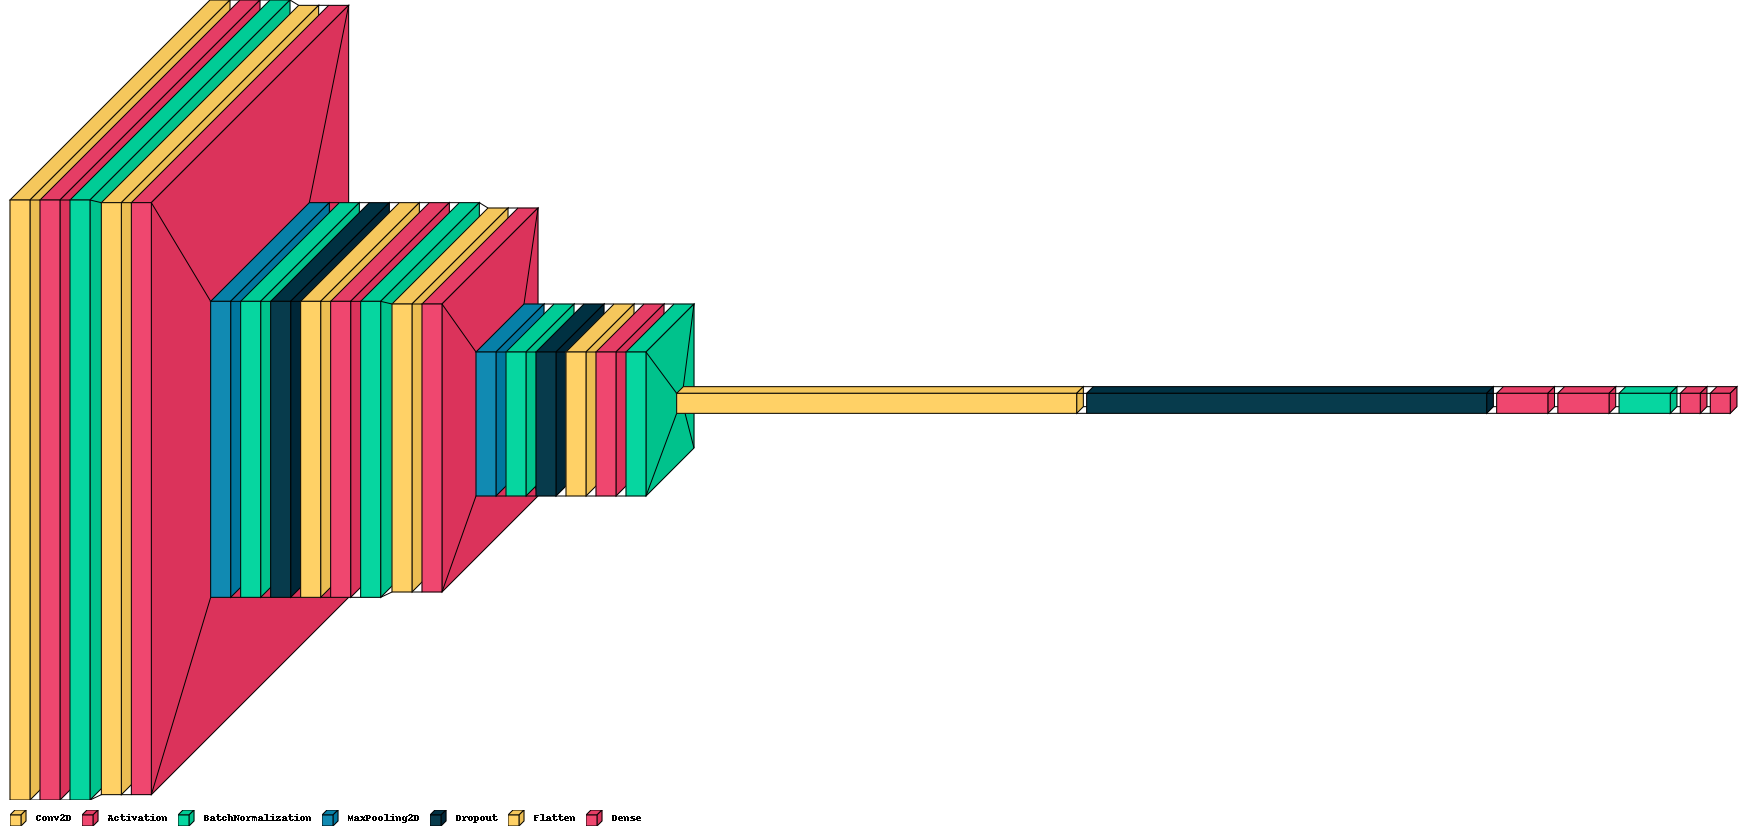

In [ ]:
visualkeras.layered_view(model_E, legend=True)

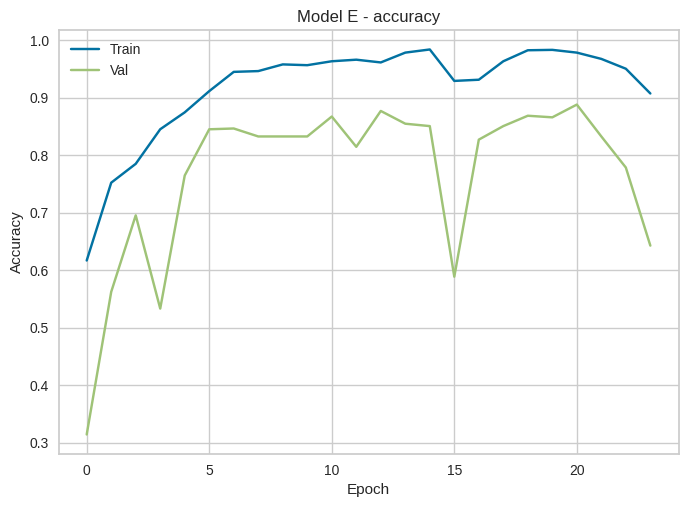

In [ ]:
plt.plot(history_E.history['accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.title('Model E - accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

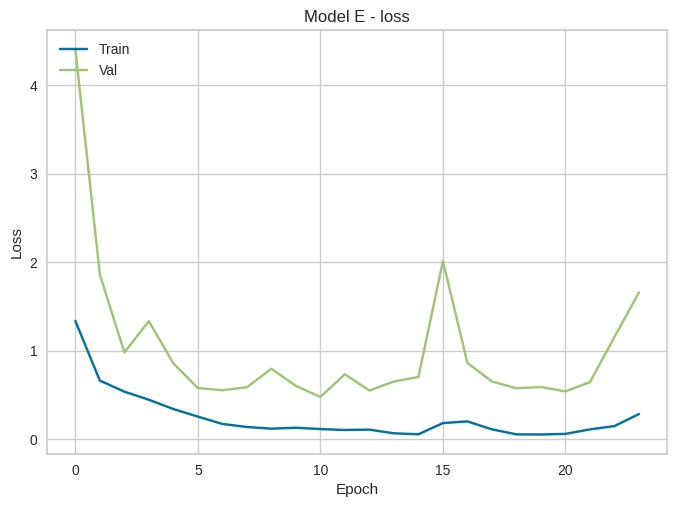

In [ ]:
plt.plot(history_E.history['loss'])
plt.plot(history_E.history['val_loss'])
plt.title('Model E - loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

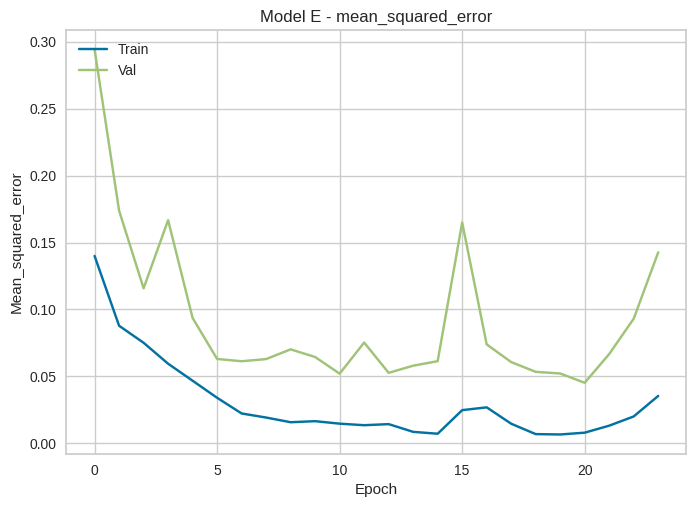

In [ ]:
plt.plot(history_E.history['mean_squared_error'])
plt.plot(history_E.history['val_mean_squared_error'])
plt.title('Model E - mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_pred_E = model_E.predict(X_test, verbose=1, batch_size=32)

34/34 [==============================] - 3s 45ms/step


<Axes: >

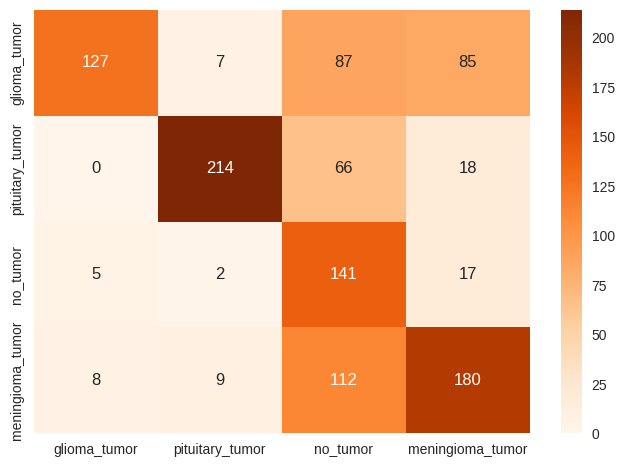

In [ ]:
CX_E =confusion_matrix(y_test.argmax(axis=1), y_pred_E.argmax(axis=1))
sns.heatmap(CX_E, annot=True, fmt=".0f", cmap='Oranges', xticklabels = classes, yticklabels = classes)


In [ ]:
eval_E = model_E.evaluate(
    x=X_test,
    y=y_test,
    batch_size=32,
    verbose=1,
    return_dict =True)

34/34 [==============================] - 1s 28ms/step - loss: 1.7883 - accuracy: 0.6141 - mean_squared_error: 0.1593


In [ ]:
eval_E = pd.Series(eval_E)
eval_E

loss                  1.788334
accuracy              0.614100
mean_squared_error    0.159281
dtype: float64

###Model F:

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf

# Load the MobileNet model with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(image_size,image_size,3)) # input_shape=(150, 150, 3)) or

# Create a Sequential model and add the MobileNet base
model_F = Sequential()
model_F.add(base_model)

# Add custom layers on top of the base MobileNet model
model_F.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3))) # input_shape=(image_size,image_size,3)))
model_F.add(MaxPooling2D(pool_size=(2, 2)))
model_F.add(Dropout(0.25))

model_F.add(Conv2D(64, (3, 3), padding='same'))
model_F.add(Activation('relu'))
model_F.add(BatchNormalization())
model_F.add(MaxPooling2D(pool_size=(2, 2)))
model_F.add(Dropout(0.25))

model_F.add(Flatten())
model_F.add(Dense(128, activation='relu'))
model_F.add(BatchNormalization())
model_F.add(Dropout(0.5))
model_F.add(Dense(4, activation='softmax'))


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
additional_metrics = [
    MeanSquaredError(),  # Mean Squared Error
]

# Define an optimizer and compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_F.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'] + additional_metrics)


# Define callbacks
early_stopping_F = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint_F = ModelCheckpoint('best_model_F.h5', monitor='val_accuracy', save_best_only=False) #to h5file

# Train the model

history_F = model_F.fit(X_train, y_train, validation_split=0.33, epochs=24, verbose=1, batch_size=32,
                                  callbacks=[early_stopping_F, model_checkpoint_F])




Epoch 1/24
46/46 [==============================] - ETA: 0s - loss: 1.5820 - accuracy: 0.4495 - mean_squared_error: 0.1912

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



46/46 [==============================] - 13s 131ms/step - loss: 1.5820 - accuracy: 0.4495 - mean_squared_error: 0.1912 - val_loss: 1.7265 - val_accuracy: 0.5042 - val_mean_squared_error: 0.1923
Epoch 2/24
46/46 [==============================] - 4s 93ms/step - loss: 0.8311 - accuracy: 0.7015 - mean_squared_error: 0.1049 - val_loss: 0.6708 - val_accuracy: 0.7521 - val_mean_squared_error: 0.0884
Epoch 3/24
46/46 [==============================] - 4s 96ms/step - loss: 0.5396 - accuracy: 0.8122 - mean_squared_error: 0.0690 - val_loss: 0.4426 - val_accuracy: 0.8546 - val_mean_squared_error: 0.0562
Epoch 4/24
46/46 [==============================] - 4s 93ms/step - loss: 0.3720 - accuracy: 0.8770 - mean_squared_error: 0.0475 - val_loss: 0.3842 - val_accuracy: 0.8753 - val_mean_squared_error: 0.0477
Epoch 5/24
46/46 [==============================] - 4s 89ms/step - loss: 0.2515 - accuracy: 0.9133 - mean_squared_error: 0.0321 - val_loss: 0.4045 - val_accuracy: 0.8698 - val_mean_squared_error: 0

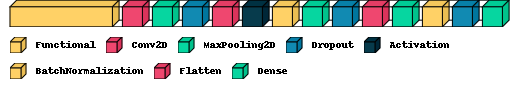

In [ ]:
visualkeras.layered_view(model_F, legend=True)

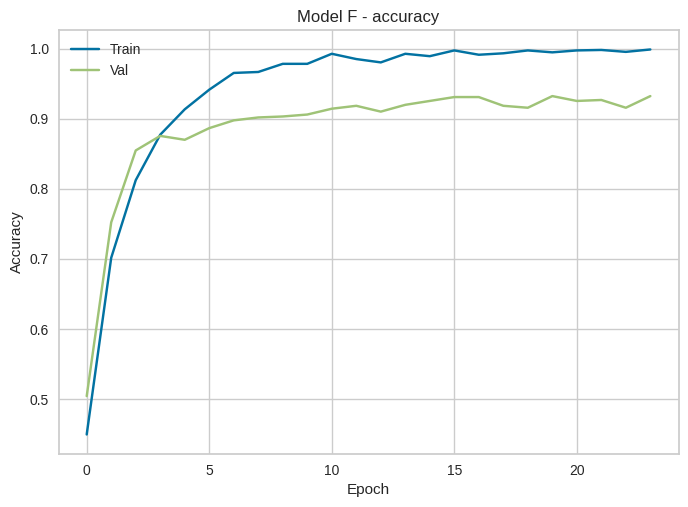

In [ ]:
plt.plot(history_F.history['accuracy'])
plt.plot(history_F.history['val_accuracy'])
plt.title('Model F - accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

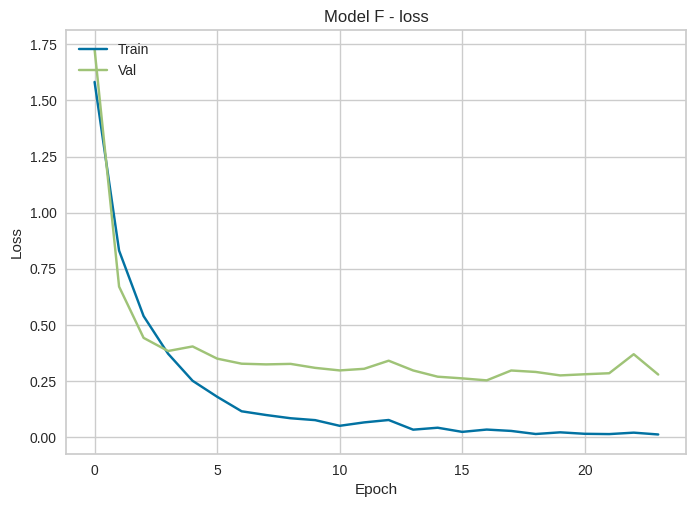

In [ ]:
plt.plot(history_F.history['loss'])
plt.plot(history_F.history['val_loss'])
plt.title('Model F - loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

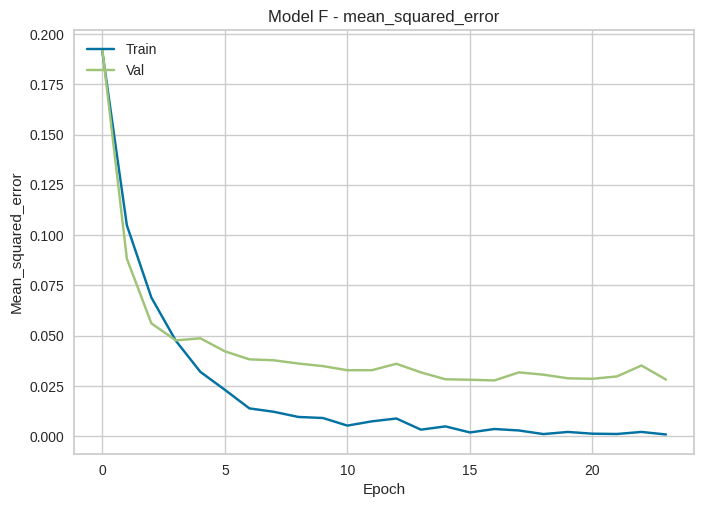

In [ ]:
plt.plot(history_F.history['mean_squared_error'])
plt.plot(history_F.history['val_mean_squared_error'])
plt.title('Model F - mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_pred_F = model_F.predict(X_test, verbose=1, batch_size=32)

34/34 [==============================] - 1s 28ms/step


<Axes: >

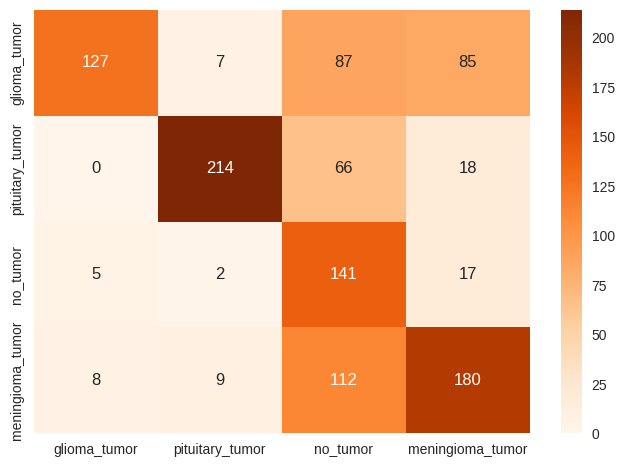

In [ ]:
CX_E =confusion_matrix(y_test.argmax(axis=1), y_pred_E.argmax(axis=1))
sns.heatmap(CX_E,annot=True, fmt=".0f", cmap='Oranges', xticklabels = classes, yticklabels = classes)


In [ ]:
eval_F = model_F.evaluate(
    x=X_test,
    y=y_test,
    batch_size=32,
    verbose=1,
    return_dict =True)

34/34 [==============================] - 1s 22ms/step - loss: 0.3212 - accuracy: 0.9165 - mean_squared_error: 0.0322


In [ ]:
eval_F = pd.Series(eval_F)
eval_F

loss                  0.321173
accuracy              0.916512
mean_squared_error    0.032166
dtype: float64

#Summary

In [ ]:
#Summing up plots

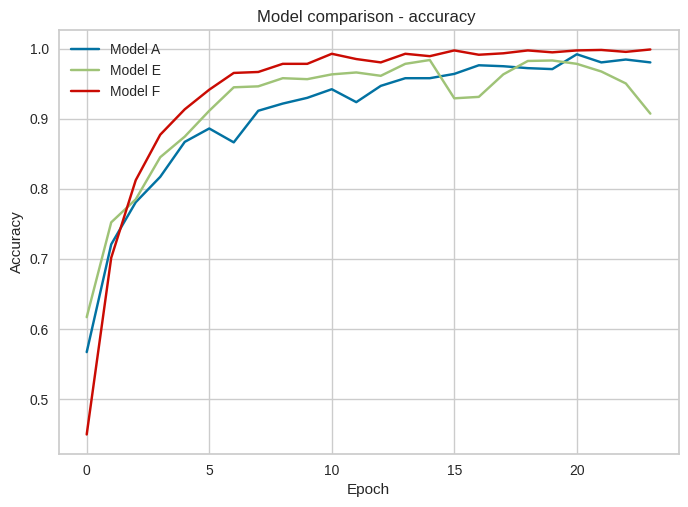

In [ ]:
plt.plot(history_A.history['accuracy'])
plt.plot(history_E.history['accuracy'])
plt.plot(history_F.history['accuracy'])

plt.title('Model comparison - accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

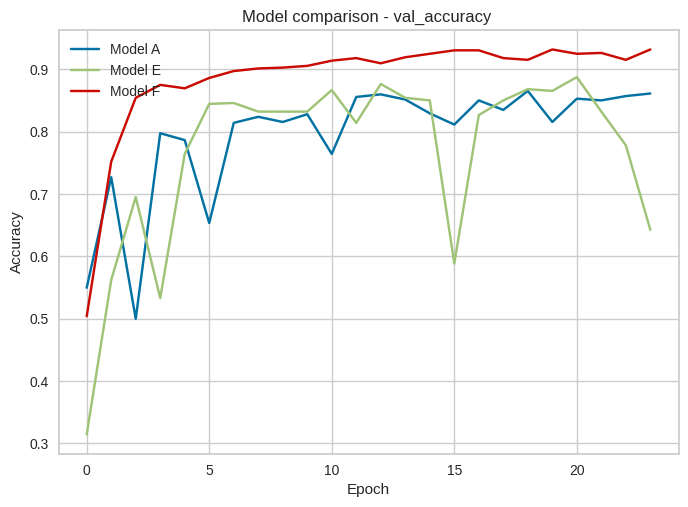

In [ ]:
plt.plot(history_A.history['val_accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.plot(history_F.history['val_accuracy'])

plt.title('Model comparison - val_accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

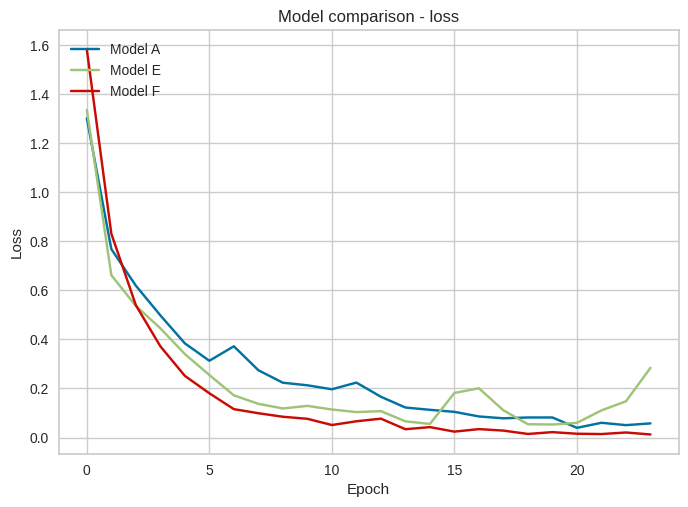

In [ ]:
plt.plot(history_A.history['loss'])
plt.plot(history_E.history['loss'])
plt.plot(history_F.history['loss'])
plt.title('Model comparison - loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

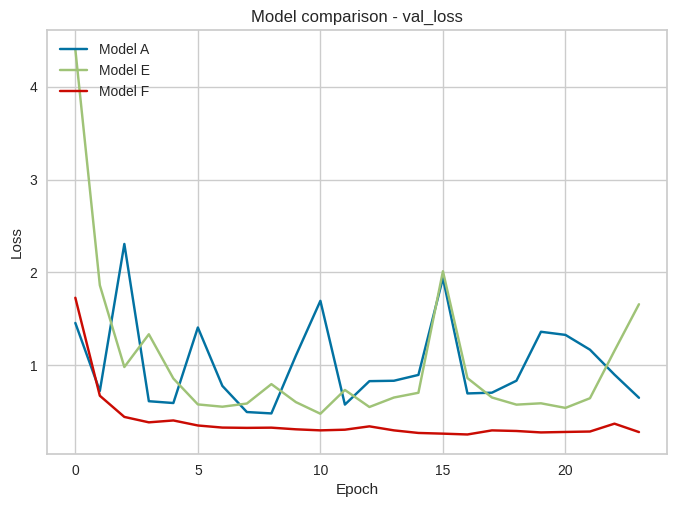

In [ ]:
plt.plot(history_A.history['val_loss'])
plt.plot(history_E.history['val_loss'])
plt.plot(history_F.history['val_loss'])
plt.title('Model comparison - val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

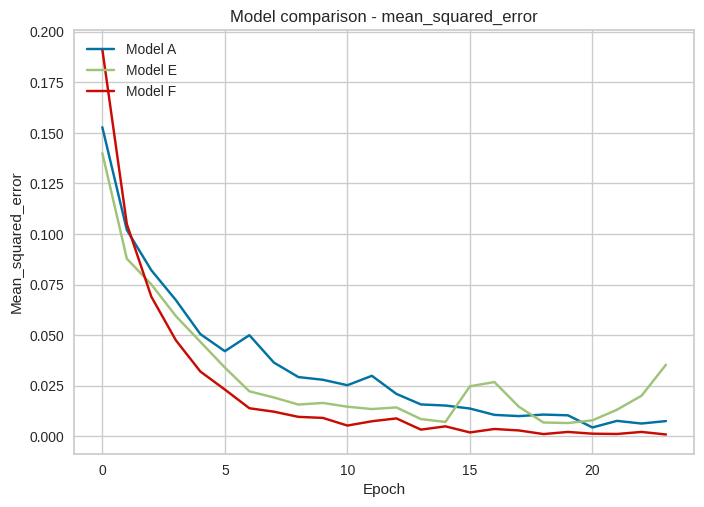

In [ ]:
plt.plot(history_A.history['mean_squared_error'])
plt.plot(history_E.history['mean_squared_error'])
plt.plot(history_F.history['mean_squared_error'])

plt.title('Model comparison - mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

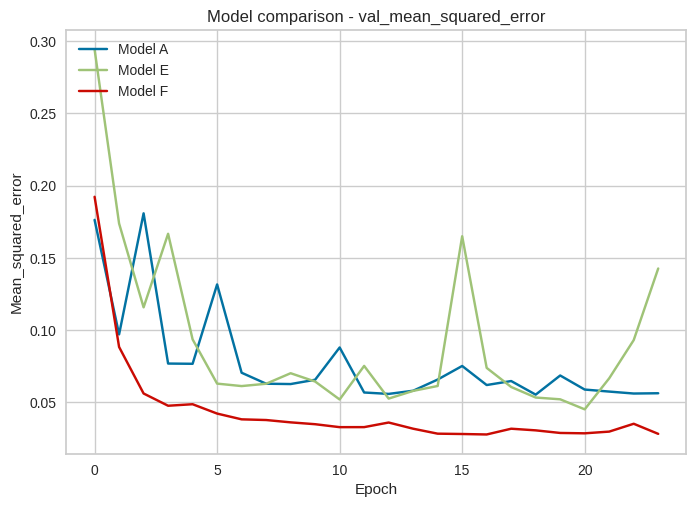

In [ ]:
plt.plot(history_A.history['val_mean_squared_error'])
plt.plot(history_E.history['val_mean_squared_error'])
plt.plot(history_F.history['val_mean_squared_error'])
plt.title('Model comparison - val_mean_squared_error')
plt.ylabel('Mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model E', 'Model F'], loc='upper left')
plt.show()

In [ ]:
#Statistisc

In [ ]:
df_eval = pd.DataFrame([eval_A, eval_E, eval_F], index =['A', 'E', 'F'])

In [ ]:
df_eval

,loss,accuracy,mean_squared_error
A,0.720728,0.831169,0.067457
E,1.788334,0.614100,0.159281
F,0.321173,0.916512,0.032166


##OLD 10:31

### Pre-processing and exploration

In [ ]:
classes = os.listdir("/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Training")
print(classes)

['nt_sagital', 'nt_axial', 'nt_coronal', 'pp_axial', 'pp_sagital', 'pp_coronal', 'mm_axial', 'mm_coronal', 'mm_sagital', 'gg_coronal', 'gg_axial', 'gg_sagital']


In [ ]:
# Define a function to load images and labels from a directory
def load_images_from_directory(directory, image_size):
    X = []  # List to store images
    y = []  # List to store labels

    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        class_images = sorted(os.listdir(class_dir))  # Sort the images alphabetically

        for image_name in tqdm(class_images):
            img = cv2.imread(os.path.join(class_dir, image_name))
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(class_name)

    return X, y

In [ ]:
# Define the desired image size
image_size = 150

# Specify the paths to training and testing directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Split_data/Training/Sorted'
test_dir = '/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Split_data/Testing/Sorted'

# Load images and labels from the training and testing directories
X_train, y_train = load_images_from_directory(train_dir, image_size)
X_test, y_test = load_images_from_directory(test_dir, image_size)

# Combine the data from both training and testing sets if needed
X = X_train + X_test
y = y_train + y_test

100%|██████████| 12/12 [00:02<00:00,  5.49it/s]


In [ ]:
# Convert the lists of images and labels to NumPy arrays for further processing
X = np.array(X)
y = np.array(y)

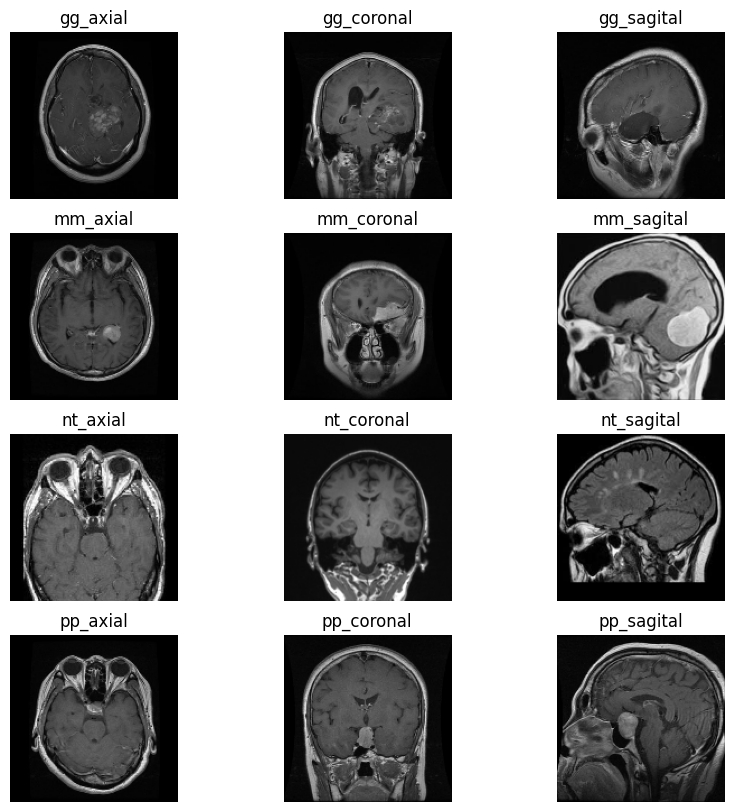

In [ ]:


# Initialize the variable k to 0
k = 0

# Create a subplot with 4 rows and 3 columns and specify the figure size
fig, ax = plt.subplots(4, 3, figsize=(10, 10))



# Sort the classes by label name
classes.sort()

# Iterate through each class (label) in the sorted 'classes' list
for i in classes:
    j = 0  # Initialize a counter variable for iterating through images

    # Start an infinite loop to find an image with the current class label
    while True:
        # Check if the label of the j-th image matches the current class 'i'
        if y[j] == i:
            # Display the image at index 'j' in the k-th subplot
            ax[k // 3, k % 3].imshow(X[j])
            ax[k // 3, k % 3].set_title(y[j])  # Set the title of the subplot to the class label
            ax[k // 3, k % 3].axis('off')  # Turn off the axis for the subplot
            k += 1  # Increment the subplot index 'k'
            break  # Exit the loop when an image of the current class is found
        j += 1  # Move to the next image if the label doesn't match

# The code will continue to fill subplots until four images from different classes are displayed.



In [ ]:
# Split the data while maintaining class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
# Initialize empty lists to store the new labels
y_train_new_A = []

# Iterate through each label in y_train
for i in y_train:
    # Find the index of the current label (class) in the 'classes' list
    index = classes.index(i)
    # Append the index (as an integer) to the 'y_train_new_A' list
    y_train_new_A.append(index)

# Update the 'y_train_A' variable to use the new labels
y_train = y_train_new_A
# Convert the integer-encoded labels in 'y_train_A' to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(classes))


In [ ]:
# Initialize an empty list to store the new labels for y_test
y_test_new_A = []

# Iterate through each label in y_test
for i in y_test:
    # Find the index of the current label (class) in the 'classes' list
    index = classes.index(i)
    # Append the index (as an integer) to the 'y_test_new' list
    y_test_new_A.append(index)

# Update the 'y_test' variable to use the new labels
y_test = y_test_new_A
y_test = tf.keras.utils.to_categorical(y_test)

###Exploring and analyzing image gata

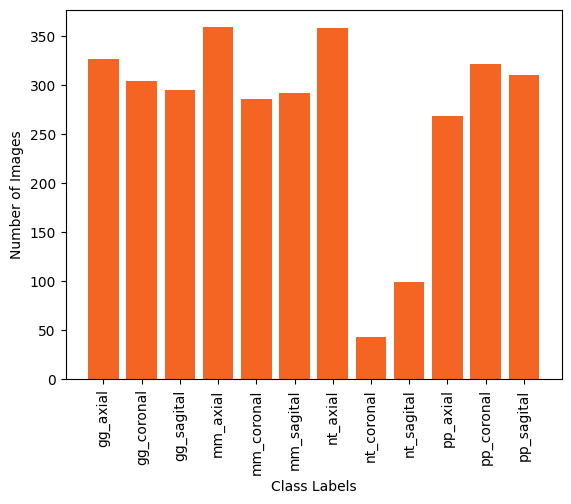

In [ ]:
# Visualizing the Distribution of Images
import matplotlib.pyplot as plt

# Count the number of images in each class
class_counts = {}
for label in y:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Extract class labels and their corresponding image counts
classes = list(class_counts.keys())
# Sort the classes by label name
classes.sort()

image_counts = [class_counts[label] for label in classes]

# Create a bar chart to visualize the distribution
plt.bar(classes, image_counts, color = '#f46524')
plt.xticks(rotation=90)
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
# Analyzing Image Properties
import os
import cv2
import numpy as np

# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image in X
for img in X:
    # Extract the size of the image
    size = img.nbytes  # Get the size in bytes
    sizes.append(size)

    # Extract the resolution of the image
    resolution = img.shape[:2]
    resolutions.append(resolution)

    # Extract the color distribution of the image
    color_distribution = np.bincount(img.flatten(), minlength=256)
    color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

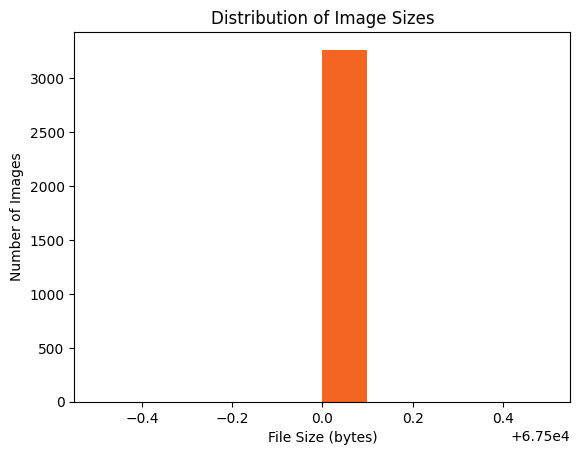

In [ ]:
# Plotting Histogram of Image Sizes
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(sizes, color = '#f46524')
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

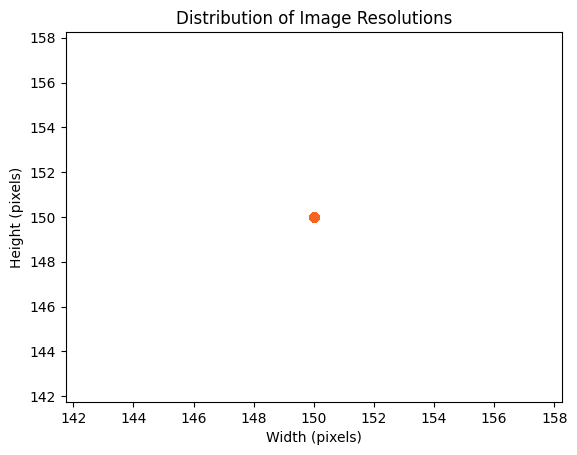

In [ ]:
# Plotting Scatter Plot of Image Resolutions
import matplotlib.pyplot as plt

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1], color = '#f46524')
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

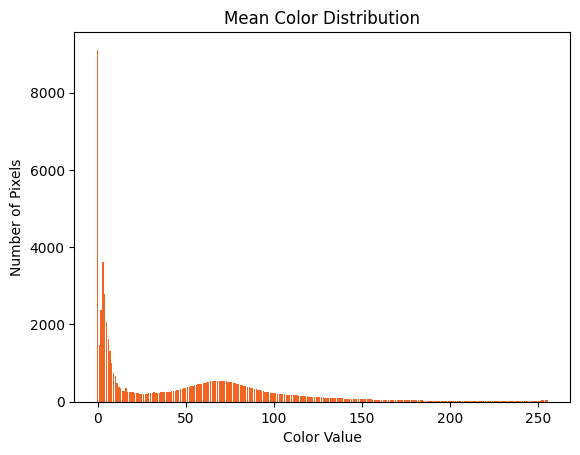

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution, color = '#f46524')
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

### Model A: CNN Benchmark [8eps val_accuracy: 0.8310]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [ ]:
X_train.shape

(2186, 150, 150, 3)

In [ ]:
y_train.shape

(2186, 12)

In [ ]:
model_A = Sequential()

model_A.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 3))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())
model_A.add(MaxPooling2D(pool_size=(2, 2))
model_A.add(Dropout(0.25))

model_A.add(Conv2D(64, (3, 3), padding='same'))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())
model_A.add(MaxPooling2D(pool_size=(2, 2))
model_A.add(Dropout(0.25))

model_A.add(Flatten())
model_A.add(Dense(128, activation='relu'))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.5))
model_A.add(Dense(12, activation='softmax'))

#model_A.summary()


In [ ]:
"""model_A = Sequential()

model_A.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3)))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())

model_A.add(Conv2D(64, (3, 3)))
model_A.add(Activation('relu'))
model_A.add(MaxPooling2D(pool_size=(2, 2)))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.35))

model_A.add(Conv2D(64, (3, 3), padding='same'))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())

model_A.add(Conv2D(64, (3, 3)))
model_A.add(Activation('relu'))
model_A.add(MaxPooling2D(pool_size=(2, 2)))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.35)) #64 --> 42

model_A.add(Conv2D(64, (3, 3), padding='same'))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())

model_A.add(Flatten())
model_A.add(Dropout(0.5))
model_A.add(Dense(512))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())
model_A.add(Dense(12)) # 12 cats
model_A.add(Activation('softmax'))

model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 activation (Activation)     (None, 150, 150, 64)      0         
                                                                 
 batch_normalization (Batch  (None, 150, 150, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                     

In [ ]:
from tensorflow.keras.metrics import MeanSquaredError, AUC, Precision, Recall, F1Score

additional_metrics = [
    MeanSquaredError(),  # Mean Squared Error
]

# Define an optimizer and compile the model
model_A.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] + additional_metrics) #SparseCategoricalCrossentropy #categorical_crossentropy

# Define callbacks
early_stopping_A = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint_A = ModelCheckpoint('best_model_A.keras', monitor='val_accuracy', save_best_only=False) #to h5file/kerasfile


In [ ]:
# Train the model
history_A = model_A.fit(X_train, y_train, validation_split=0.33, epochs=24, verbose=1, batch_size=12,
                                  callbacks=[early_stopping_A, model_checkpoint_A])

Epoch 1/24
122/122 [==============================] - 23s 109ms/step - loss: 1.4982 - accuracy: 0.5908 - mean_squared_error: 0.0484 - val_loss: 8.1431 - val_accuracy: 0.2161 - val_mean_squared_error: 0.1107
Epoch 2/24
122/122 [==============================] - 12s 101ms/step - loss: 0.7523 - accuracy: 0.7596 - mean_squared_error: 0.0293 - val_loss: 0.9491 - val_accuracy: 0.7548 - val_mean_squared_error: 0.0337
Epoch 3/24
122/122 [==============================] - 13s 105ms/step - loss: 0.4825 - accuracy: 0.8286 - mean_squared_error: 0.0205 - val_loss: 0.8743 - val_accuracy: 0.7632 - val_mean_squared_error: 0.0285
Epoch 4/24
122/122 [==============================] - 12s 101ms/step - loss: 0.3580 - accuracy: 0.8709 - mean_squared_error: 0.0152 - val_loss: 0.7748 - val_accuracy: 0.7839 - val_mean_squared_error: 0.0277
Epoch 5/24
122/122 [==============================] - 20s 164ms/step - loss: 0.2269 - accuracy: 0.9262 - mean_squared_error: 0.0094 - val_loss: 0.7882 - val_accuracy: 0.796

In [ ]:
# visualkeras.layered_view(model_A, legend=True)

In [ ]:
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image, display

# # Create a high-level horizontal visualization
# def create_horizontal_model_plot(model, filename):
#     plot_model(model, to_file=filename, show_shapes=True, show_layer_names=False, rankdir='LR')
#     img = Image(filename)
#     return img

# # Assuming you've already defined your 'model_A' as described in your code.
# model_A_horizontal_plot = create_horizontal_model_plot(model_A, "model_A_horizontal_visualization.png")

# # Display the generated horizontal visualization
# display(model_A_horizontal_plot)


In [ ]:
# from tensorflow.keras.utils import plot_model
# import pydot
# from IPython.display import Image

# # Define a function to create a more visually attractive plot
# def create_attractive_plot(model, filename):
#     plot_model(model, to_file=filename, show_shapes=True, show_layer_names=False, dpi=96)
#     img = Image(filename)
#     return img

# # Assuming you've already defined your 'model_A' as described in your code.
# model_A_plot = create_attractive_plot(model_A, "model_A_attractive_visualization.png")

# # Display the generated image
# model_A_plot


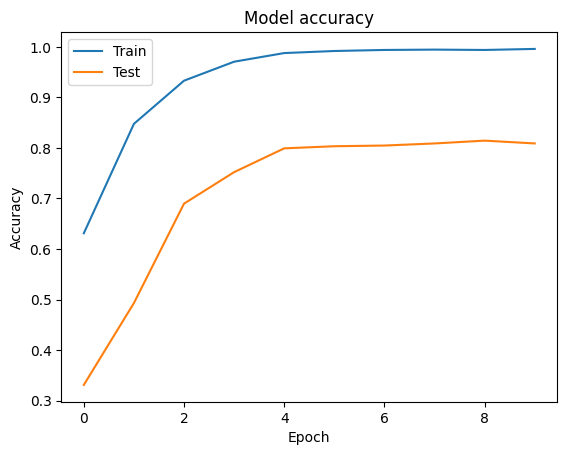

In [ ]:
plt.plot(history_A.history['accuracy'])
plt.plot(history_A.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

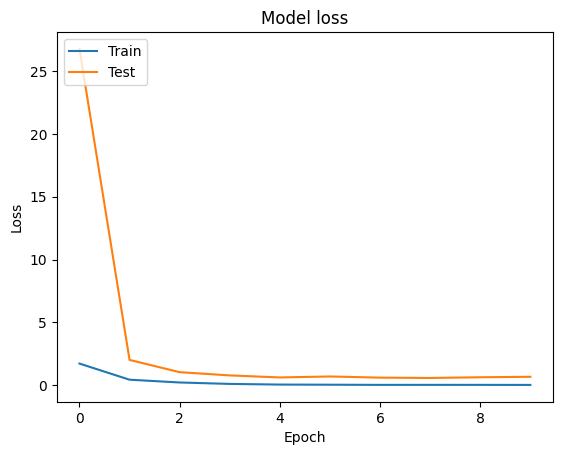

In [ ]:
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred_A = model_A.predict(X_test_A, verbose=1, batch_size=32)

34/34 [==============================] - 1s 36ms/step


In [ ]:
model_A

In [ ]:
CX_A =confusion_matrix(y_test_A.argmax(axis=1), y_pred_A.argmax(axis=1))
sns.heatmap(CX,annot=True, fmt=".0f", cmap='Oranges')


NameError: ignored

In [ ]:
# Calculate and print the confusion matrix for each class
class_cms = multilabel_confusion_matrix(y_test_A.argmax(axis=1), y_pred_A.argmax(axis=1))

# Determine the number of classes
num_classes = len(class_cms)

# Create a grid of subplots
fig, axes = plt.subplots(num_classes, 1, figsize=(6, 4 * num_classes))

for i, class_cm in enumerate(class_cms):
    ax = axes[i]
    sns.heatmap(class_cm, annot=True, cmap="crest", ax=ax, fmt=".0f")
    ax.set_title(f"Confusion matrix for class {i}")
    # print(f"Confusion matrix for class {i}:")
    # print(class_cm)

plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
eval_A = model_A.evaluate(
    x=X_test_A,
    y=y_test_A,
    batch_size=32,
    verbose=1,
    return_dict =True)

In [ ]:
eval_A = pd.Series(eval_A)
eval_A

In [ ]:
 model_A.metrics_names

### Model E:
CNN with starify, agumentation, flow, early stoping, checkpoint [20eps val_accuracy: 85


In [ ]:
y_train_E.shape

(1922,)

In [ ]:
img_datagen_E = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen_E.fit(X_train)
img_datagen_E.fit(X_test)

In [ ]:
# Create a generator for training data
train_data_generator = img_datagen_E.flow(X_train, y_train, batch_size=32)

In [ ]:
model_E = Sequential()

model_E.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3)))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Conv2D(64, (3, 3)))
model_E.add(Activation('relu'))
model_E.add(MaxPooling2D(pool_size=(2, 2)))
model_E.add(BatchNormalization())
model_E.add(Dropout(0.33))

model_E.add(Conv2D(64, (3, 3), padding='same'))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Conv2D(64, (3, 3)))
model_E.add(Activation('relu'))
model_E.add(MaxPooling2D(pool_size=(2, 2)))
model_E.add(BatchNormalization())
model_E.add(Dropout(0.33))

model_E.add(Conv2D(64, (3, 3), padding='same'))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Flatten())
model_E.add(Dropout(0.5))
model_E.add(Dense(512))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())
model_E.add(Dense(12))
model_E.add(Activation('softmax'))

#model_E.summary()

In [ ]:
from tensorflow.keras.metrics import MeanSquaredError, AUC, Precision, Recall, F1Score

# Specify the additional metrics
additional_metrics = [
    MeanSquaredError(),  # Mean Squared Error
]

# Define an optimizer and compile the model
model_E.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] + additional_metrics)

# Define callbacks
early_stopping_E = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint_E = ModelCheckpoint('best_model_E.keras', monitor='val_accuracy', save_best_only=False) #to h5file/keras

In [ ]:
# Train the model
history_E = model_E.fit(X_train, y_train, validation_split=0.33, epochs=24, verbose=1, batch_size=12,
                                  callbacks=[early_stopping_E, model_checkpoint_E])

Epoch 1/24
122/122 [==============================] - 18s 112ms/step - loss: 1.4964 - accuracy: 0.5902 - mean_squared_error: 0.0496 - val_loss: 1.3774 - val_accuracy: 0.5886 - val_mean_squared_error: 0.0477
Epoch 2/24
122/122 [==============================] - 13s 107ms/step - loss: 0.7662 - accuracy: 0.7473 - mean_squared_error: 0.0300 - val_loss: 1.4764 - val_accuracy: 0.6759 - val_mean_squared_error: 0.0415
Epoch 3/24
122/122 [==============================] - 13s 103ms/step - loss: 0.5178 - accuracy: 0.8299 - mean_squared_error: 0.0216 - val_loss: 0.8819 - val_accuracy: 0.7659 - val_mean_squared_error: 0.0303
Epoch 4/24
122/122 [==============================] - 12s 100ms/step - loss: 0.3697 - accuracy: 0.8695 - mean_squared_error: 0.0156 - val_loss: 1.0479 - val_accuracy: 0.6967 - val_mean_squared_error: 0.0383
Epoch 5/24
122/122 [==============================] - 15s 125ms/step - loss: 0.2775 - accuracy: 0.9092 - mean_squared_error: 0.0115 - val_loss: 0.5832 - val_accuracy: 0.842

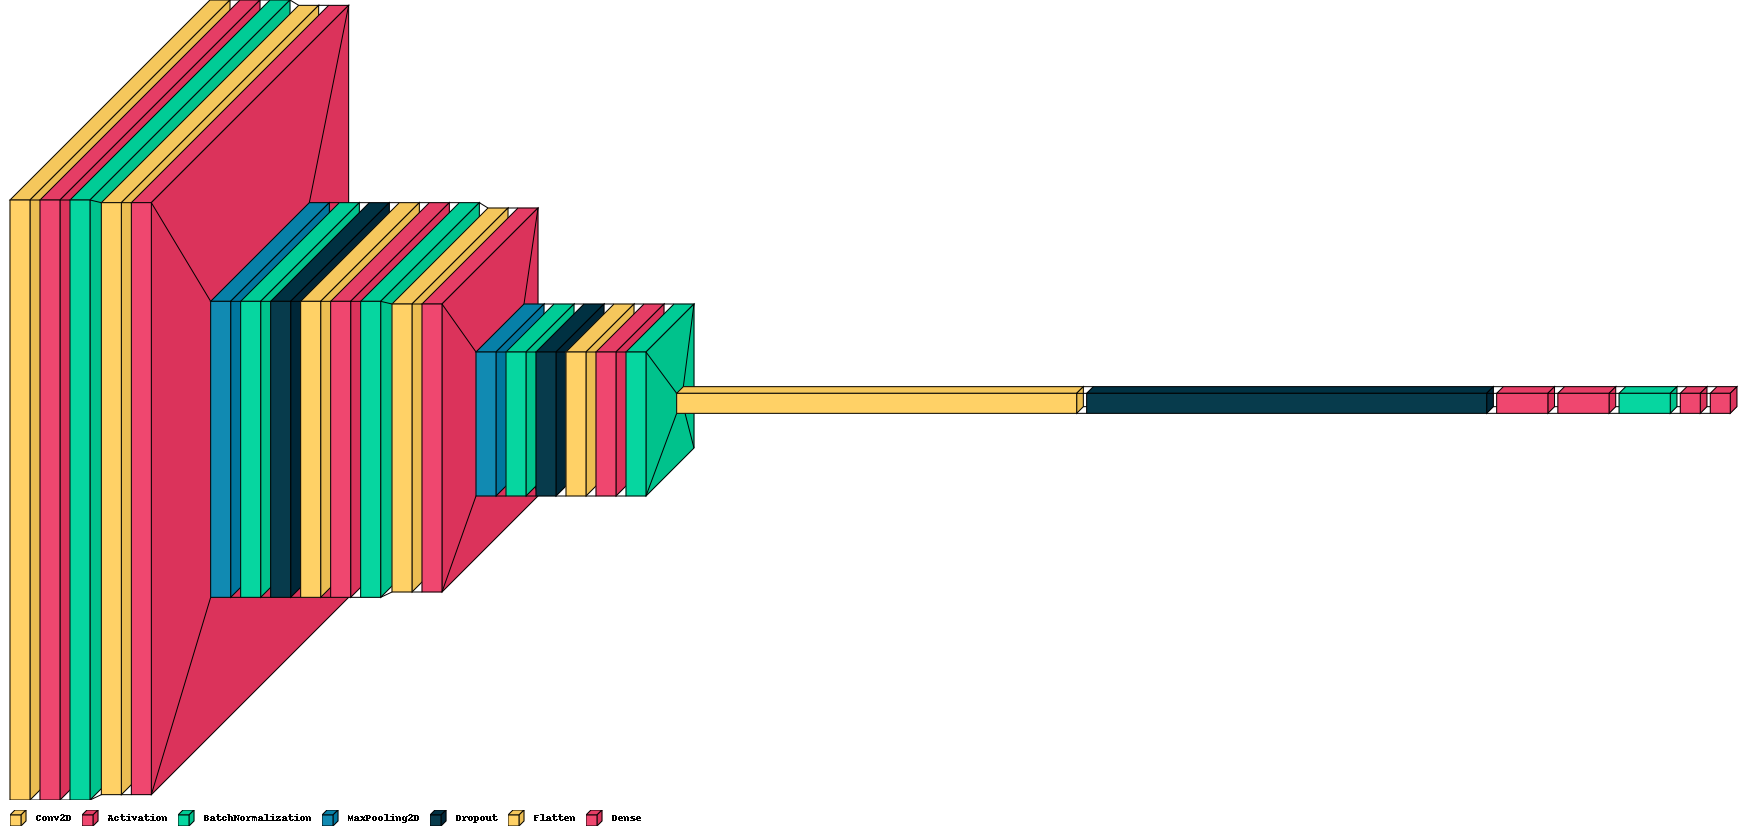

In [ ]:
visualkeras.layered_view(model_E, legend=True)

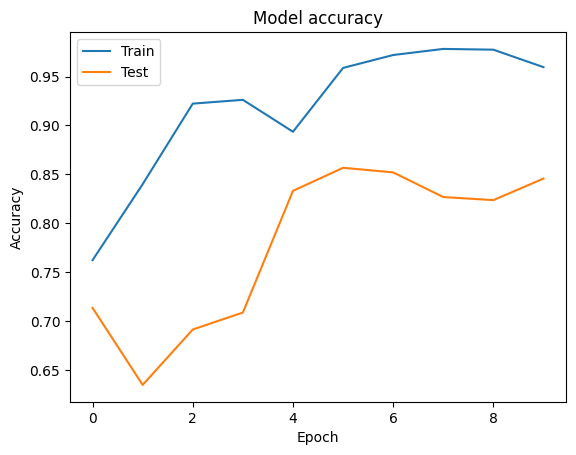

In [ ]:
plt.plot(history_E.history['accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

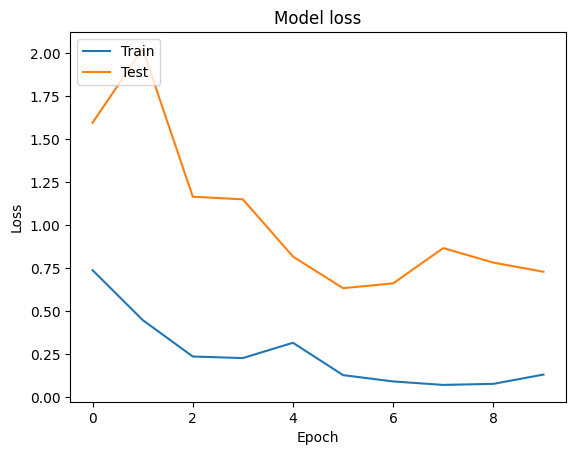

In [ ]:
plt.plot(history_E.history['loss'])
plt.plot(history_E.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
"""
from lime.lime_image import LimeImageExplainer
import matplotlib.pyplot as plt

# Choose a specific image by index
selected_image = X_train_E[9]  # Assuming you want to select the 10th image (index 9)
selected_label = y_train_E[9]  # Corresponding label for the selected image

# Define a function to predict using your model_E
def predict_fn(image):
    # Preprocess the image if necessary and ensure it's in the correct shape expected by model_E
    return model_E.predict(image)

# Create an explainer for image data
explainer = LimeImageExplainer()

# Explain the model_E's prediction on the specific image (use the correct variable 'selected_image')
explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=3)

# Get the explanation image and mask
explanation_image, explanation_mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)

# Visualize the explanation image and mask using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(explanation_image)
plt.title("Explanation Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(explanation_mask, cmap='hot', alpha=0.6)
plt.title("Explanation Mask")
plt.axis("off")

plt.show()
"""

'\nfrom lime.lime_image import LimeImageExplainer\nimport matplotlib.pyplot as plt\n\n# Choose a specific image by index\nselected_image = X_train_E[9]  # Assuming you want to select the 10th image (index 9)\nselected_label = y_train_E[9]  # Corresponding label for the selected image\n\n# Define a function to predict using your model_E\ndef predict_fn(image):\n    # Preprocess the image if necessary and ensure it\'s in the correct shape expected by model_E\n    return model_E.predict(image)\n\n# Create an explainer for image data\nexplainer = LimeImageExplainer()\n\n# Explain the model_E\'s prediction on the specific image (use the correct variable \'selected_image\')\nexplanation = explainer.explain_instance(selected_image, predict_fn, top_labels=3)\n\n# Get the explanation image and mask\nexplanation_image, explanation_mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)\n\n# Visualize the explanation image and mask using matplotlib\np

##OLD

### Pre-processing and exploration

In [ ]:
classes = os.listdir("/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Training")
print(classes)

['glioma_tumor', 'pituitary_tumor', 'no_tumor', 'meningioma_tumor']


In [ ]:
# Create empty lists to store images and their corresponding labels
X = []  # List to store images
y = []  # List to store labels (classes)
image_size = 150  # Define the desired image size

In [ ]:
for i in classes:  # Iterate through the classes (folders) in the Training directory
    # Create the path to the folder for the current class
    folderPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Training', i)

    # Iterate through the files (images) in the current class folder
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)

100%|██████████| 822/822 [00:08<00:00, 101.19it/s]


In [ ]:
# Repeat the same process for the Testing directory to include test images
for i in classes:
    folderPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/brain-tumor-classification/Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(i)

100%|██████████| 115/115 [00:00<00:00, 189.81it/s]


In [ ]:
# Convert the lists of images and labels to NumPy arrays for further processing
X = np.array(X)
y = np.array(y)

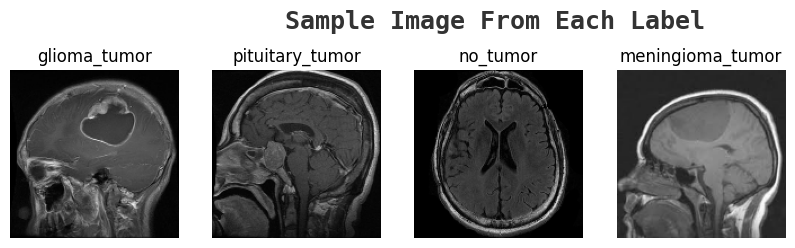

In [ ]:
# Initialize the variable k to 0
k = 0

# Create a subplot with 1 row and 4 columns and specify the figure size
fig, ax = plt.subplots(1, 4, figsize=(10, 10))

# Add a text annotation to the figure to provide a title
fig.text(s='Sample Image From Each Label', size=18, fontweight='bold',
         fontname='monospace', y=0.62, x=0.4, alpha=0.8)

# Iterate through each class (label) in the 'classes' list
for i in classes:
    j = 0  # Initialize a counter variable for iterating through images

    # Start an infinite loop to find an image with the current class label
    while True:
        # Check if the label of the j-th image matches the current class 'i'
        if y[j] == i:
            # Display the image at index 'j' in the k-th subplot
            ax[k].imshow(X[j])
            ax[k].set_title(y[j])  # Set the title of the subplot to the class label
            ax[k].axis('off')  # Turn off the axis for the subplot
            k += 1  # Increment the subplot index 'k'
            break  # Exit the loop when an image of the current class is found
        j += 1  # Move to the next image if the label doesn't match

# The code will continue to fill subplots until four images from different classes are displayed.


###Exploring and analyzing image gata

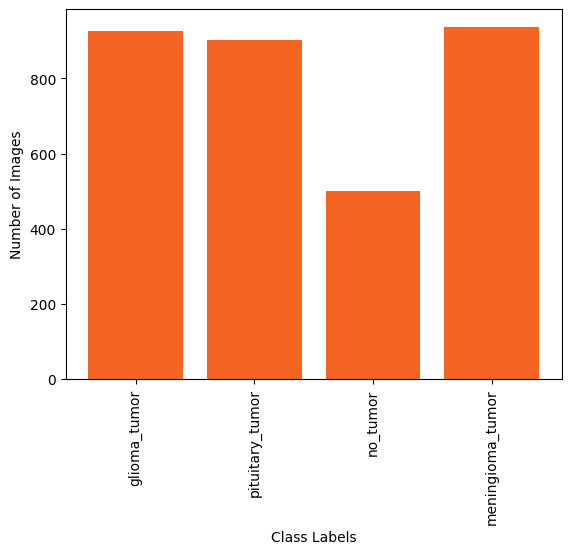

In [ ]:
# Visualizing the Distribution of Images
import matplotlib.pyplot as plt

# Count the number of images in each class
class_counts = {}
for label in y:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Extract class labels and their corresponding image counts
classes = list(class_counts.keys())
image_counts = [class_counts[label] for label in classes]

# Create a bar chart to visualize the distribution
plt.bar(classes, image_counts, color = '#f46524')
plt.xticks(rotation=90)
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
# Analyzing Image Properties
import os
import cv2
import numpy as np

# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image in X
for img in X:
    # Extract the size of the image
    size = img.nbytes  # Get the size in bytes
    sizes.append(size)

    # Extract the resolution of the image
    resolution = img.shape[:2]
    resolutions.append(resolution)

    # Extract the color distribution of the image
    color_distribution = np.bincount(img.flatten(), minlength=256)
    color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

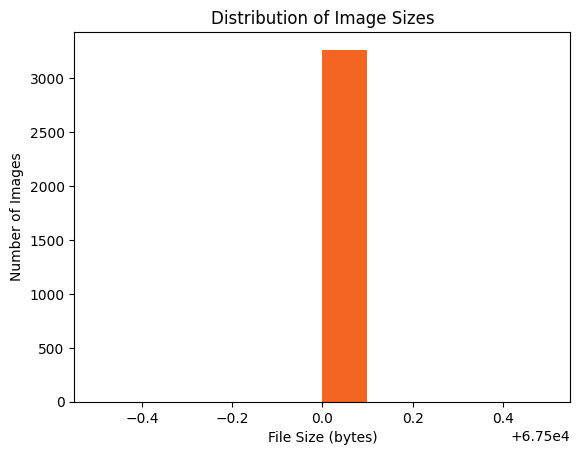

In [ ]:
# Plotting Histogram of Image Sizes
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(sizes, color = '#f46524')
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

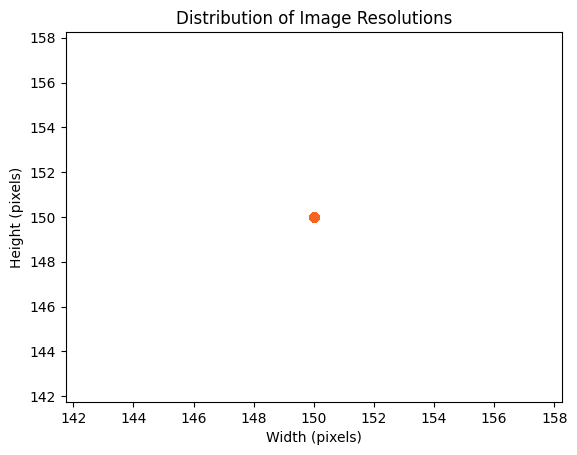

In [ ]:
# Plotting Scatter Plot of Image Resolutions
import matplotlib.pyplot as plt

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1], color = '#f46524')
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

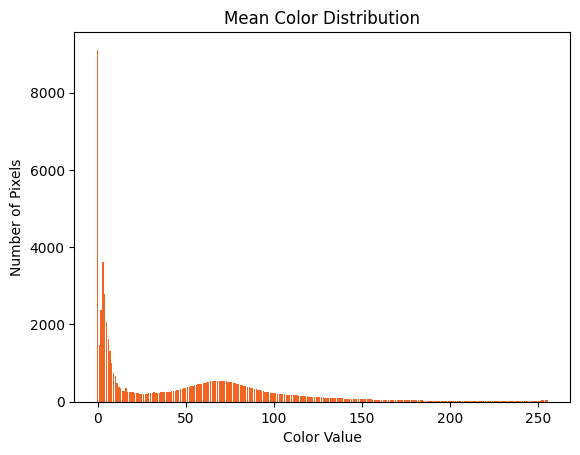

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution, color = '#f46524')
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

### Model A: CNN Benchmark [8eps val_accuracy: 0.8310]

In [ ]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X,y, test_size=0.33,random_state=42)

In [ ]:
# Initialize empty lists to store the new labels
y_train_new_A = []

# Iterate through each label in y_train
for i in y_train_A:
    # Find the index of the current label (class) in the 'classes' list
    index = classes.index(i)
    # Append the index (as an integer) to the 'y_train_new' list
    y_train_new_A.append(index)

# Update the 'y_train' variable to use the new labels
y_train_A = y_train_new_A
# Convert the integer-encoded labels in 'y_train' to one-hot encoded vectors
y_train_A = tf.keras.utils.to_categorical(y_train_A)

In [ ]:
# Initialize an empty list to store the new labels for y_test
y_test_new_A = []

# Iterate through each label in y_test
for i in y_test_A:
    # Find the index of the current label (class) in the 'classes' list
    index = classes.index(i)
    # Append the index (as an integer) to the 'y_test_new' list
    y_test_new_A.append(index)

# Update the 'y_test' variable to use the new labels
y_test_A = y_test_new_A
y_test_A = tf.keras.utils.to_categorical(y_test_A)

In [ ]:
model_A = Sequential()

model_A.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3)))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())

model_A.add(Conv2D(64, (3, 3)))
model_A.add(Activation('relu'))
model_A.add(MaxPooling2D(pool_size=(2, 2)))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.35))

model_A.add(Conv2D(64, (3, 3), padding='same'))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())

model_A.add(Conv2D(64, (3, 3)))
model_A.add(Activation('relu'))
model_A.add(MaxPooling2D(pool_size=(2, 2)))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.35)) #64 --> 42

model_A.add(Conv2D(64, (3, 3), padding='same'))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())

model_A.add(Flatten())
model_A.add(Dropout(0.5))
model_A.add(Dense(512))
model_A.add(Activation('relu'))
model_A.add(BatchNormalization())
model_A.add(Dense(4))
model_A.add(Activation('softmax'))

model_A.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 activation_21 (Activation)  (None, 150, 150, 64)      0         
                                                                 
 batch_normalization_18 (Ba  (None, 150, 150, 64)      256       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 148, 148, 64)      36928     
                                                                 
 activation_22 (Activation)  (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                 

In [ ]:
# visualkeras.layered_view(model_A, legend=True)

In [ ]:
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image, display

# # Create a high-level horizontal visualization
# def create_horizontal_model_plot(model, filename):
#     plot_model(model, to_file=filename, show_shapes=True, show_layer_names=False, rankdir='LR')
#     img = Image(filename)
#     return img

# # Assuming you've already defined your 'model_A' as described in your code.
# model_A_horizontal_plot = create_horizontal_model_plot(model_A, "model_A_horizontal_visualization.png")

# # Display the generated horizontal visualization
# display(model_A_horizontal_plot)


In [ ]:
# from tensorflow.keras.utils import plot_model
# import pydot
# from IPython.display import Image

# # Define a function to create a more visually attractive plot
# def create_attractive_plot(model, filename):
#     plot_model(model, to_file=filename, show_shapes=True, show_layer_names=False, dpi=96)
#     img = Image(filename)
#     return img

# # Assuming you've already defined your 'model_A' as described in your code.
# model_A_plot = create_attractive_plot(model_A, "model_A_attractive_visualization.png")

# # Display the generated image
# model_A_plot


In [ ]:
model_A.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
history_A = model_A.fit(X_train_A,y_train_A, validation_split=0.33, epochs =8, verbose=1, batch_size=32)

Epoch 1/8
46/46 [==============================] - 459s 10s/step - loss: 1.5504 - accuracy: 0.6216 - val_loss: 14.2512 - val_accuracy: 0.2687
Epoch 2/8
46/46 [==============================] - 451s 10s/step - loss: 0.5902 - accuracy: 0.7842 - val_loss: 2.8810 - val_accuracy: 0.3947
Epoch 3/8
46/46 [==============================] - 452s 10s/step - loss: 0.3862 - accuracy: 0.8531 - val_loss: 1.1495 - val_accuracy: 0.5540
Epoch 4/8
46/46 [==============================] - 415s 9s/step - loss: 0.2536 - accuracy: 0.8996 - val_loss: 1.1265 - val_accuracy: 0.5596
Epoch 5/8
46/46 [==============================] - 416s 9s/step - loss: 0.2350 - accuracy: 0.9126 - val_loss: 1.0029 - val_accuracy: 0.6814
Epoch 6/8
46/46 [==============================] - 453s 10s/step - loss: 0.1590 - accuracy: 0.9460 - val_loss: 0.5661 - val_accuracy: 0.8227
Epoch 7/8
46/46 [==============================] - 451s 10s/step - loss: 0.1059 - accuracy: 0.9665 - val_loss: 0.5448 - val_accuracy: 0.8324
Epoch 8/8
46/4

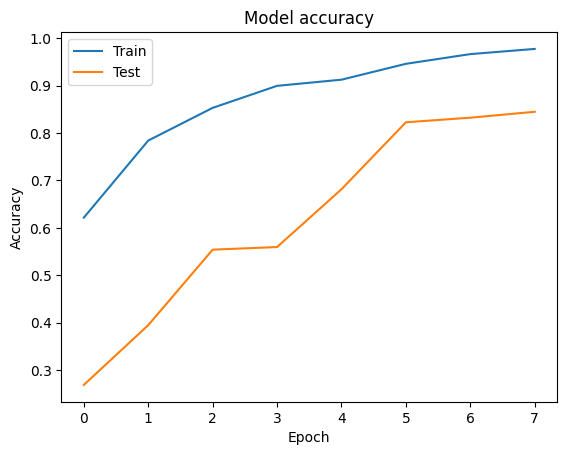

In [ ]:
plt.plot(history_A.history['accuracy'])
plt.plot(history_A.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

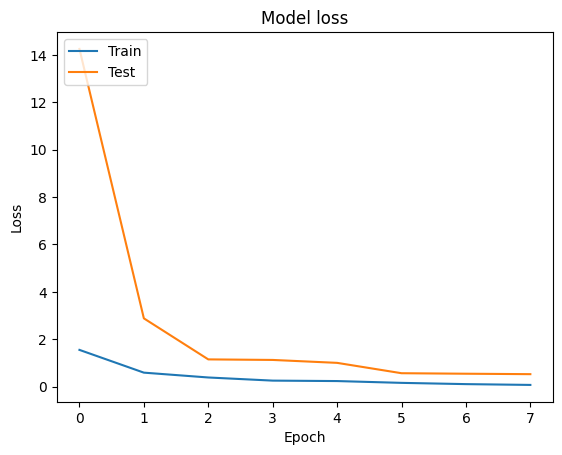

In [ ]:
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred_A = model_A.predict(X_test_A, verbose=1, batch_size=32)

34/34 [==============================] - 68s 2s/step


In [ ]:
model_A

<Axes: >

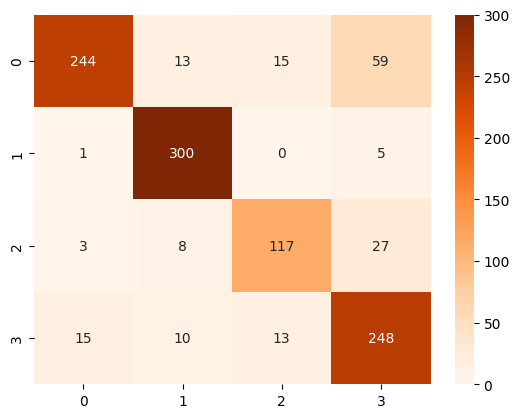

In [ ]:
CX_A =confusion_matrix(y_test_A.argmax(axis=1), y_pred_A.argmax(axis=1))
sns.heatmap(CX_A,annot=True, fmt=".0f", cmap='Oranges')


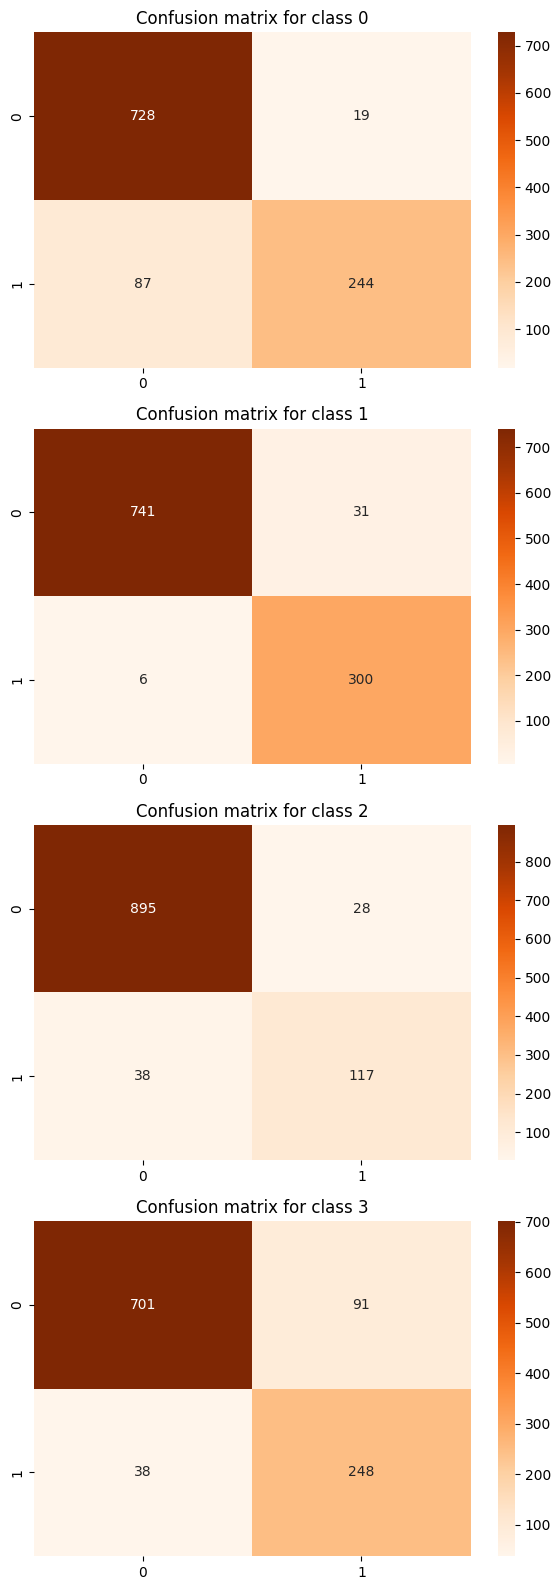

In [ ]:
# Calculate and print the confusion matrix for each class
class_cms = multilabel_confusion_matrix(y_test_A.argmax(axis=1), y_pred_A.argmax(axis=1))

# Determine the number of classes
num_classes = len(class_cms)

# Create a grid of subplots
fig, axes = plt.subplots(num_classes, 1, figsize=(6, 4 * num_classes))

for i, class_cm in enumerate(class_cms):
    ax = axes[i]
    sns.heatmap(class_cm, annot=True, cmap="Oranges", ax=ax, fmt=".0f")
    ax.set_title(f"Confusion matrix for class {i}")
    # print(f"Confusion matrix for class {i}:")
    # print(class_cm)

plt.tight_layout()
plt.show()

In [ ]:
eval_A = model_A.evaluate(
    x=X_test_A,
    y=y_test_A,
    batch_size=32,
    verbose=1,
    return_dict =True)

34/34 [==============================] - 70s 2s/step - loss: 0.5389 - accuracy: 0.8432


In [ ]:
eval_A = pd.Series(eval_A)
eval_A

loss        0.538919
accuracy    0.843228
dtype: float64

In [ ]:
 model_A.metrics_names

['loss', 'accuracy']

### Model E: CNN with starify, agumentation, flow, early stoping, checkpoint [20eps val_accuracy: 85


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Split the data while maintaining class distribution
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
y_train_new_E = []

for i in y_train_E:
    index = classes.index(i)
    y_train_new_E.append(index)

y_train_E = y_train_new_E
y_train_E = tf.keras.utils.to_categorical(y_train_E)

In [ ]:
y_test_new_E = []

for i in y_test_E:
    index = classes.index(i)
    y_test_new_E.append(index)

y_test_E = y_test_new_E
y_test_E = tf.keras.utils.to_categorical(y_test_E)

In [ ]:
img_datagen_E = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen_E.fit(X_train_E)
img_datagen_E.fit(X_test_E)

In [ ]:
# Create a generator for training data
train_data_generator = img_datagen_E.flow(X_train_E, y_train_E, batch_size=32)

In [ ]:
model_E = Sequential()

model_E.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3)))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Conv2D(64, (3, 3)))
model_E.add(Activation('relu'))
model_E.add(MaxPooling2D(pool_size=(2, 2)))
model_E.add(BatchNormalization())
model_E.add(Dropout(0.33))

model_E.add(Conv2D(64, (3, 3), padding='same'))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Conv2D(64, (3, 3)))
model_E.add(Activation('relu'))
model_E.add(MaxPooling2D(pool_size=(2, 2)))
model_E.add(BatchNormalization())
model_E.add(Dropout(0.33))

model_E.add(Conv2D(64, (3, 3), padding='same'))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())

model_E.add(Flatten())
model_E.add(Dropout(0.5))
model_E.add(Dense(512))
model_E.add(Activation('relu'))
model_E.add(BatchNormalization())
model_E.add(Dense(4))
model_E.add(Activation('softmax'))

#model_E.summary()

In [ ]:
model_E.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stopping_E = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint_E = ModelCheckpoint('best_model_E.h5', monitor='val_accuracy', save_best_only=True) #to h5file

# Train the model
history_E = model_E.fit(X_train_E, y_train_E, validation_split=0.33, epochs=50, verbose=1, batch_size=32,
                    callbacks=[early_stopping_E, model_checkpoint_E])


Epoch 1/50
 2/46 [>.............................] - ETA: 5:29 - loss: 2.5773 - accuracy: 0.3438

KeyboardInterrupt: ignored

In [ ]:
visualkeras.layered_view(model_E, legend=True)

In [ ]:
plt.plot(history_E.history['accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_E.history['loss'])
plt.plot(history_E.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from lime.lime_image import LimeImageExplainer
import matplotlib.pyplot as plt

# Choose a specific image by index
selected_image = X_train_E[9]  # Assuming you want to select the 10th image (index 9)
selected_label = y_train_E[9]  # Corresponding label for the selected image

# Define a function to predict using your model_E
def predict_fn(image):
    # Preprocess the image if necessary and ensure it's in the correct shape expected by model_E
    return model_E.predict(image)

# Create an explainer for image data
explainer = LimeImageExplainer()

# Explain the model_E's prediction on the specific image (use the correct variable 'selected_image')
explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=3)

# Get the explanation image and mask
explanation_image, explanation_mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)

# Visualize the explanation image and mask using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(explanation_image)
plt.title("Explanation Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(explanation_mask, cmap='hot', alpha=0.6)
plt.title("Explanation Mask")
plt.axis("off")

plt.show()

### Model E: with ---mobileNet--- CNN with starify, agumentation, flow, early stoping, checkpoint [20eps val_accuracy: 85


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Split the data while maintaining class distribution
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
y_train_new_E = []

for i in y_train_E:
    index = classes.index(i)
    y_train_new_E.append(index)

y_train_E = y_train_new_E
y_train_E = tf.keras.utils.to_categorical(y_train_E)

In [ ]:
y_test_new_E = []

for i in y_test_E:
    index = classes.index(i)
    y_test_new_E.append(index)

y_test_E = y_test_new_E
y_test_E = tf.keras.utils.to_categorical(y_test_E)

In [ ]:
img_datagen_E = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen_E.fit(X_train_E)
img_datagen_E.fit(X_test_E)

In [ ]:
# Create a generator for training data
train_data_generator = img_datagen_E.flow(X_train_E, y_train_E, batch_size=32)

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf

# Load the MobileNet model with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(image_size,image_size,3)) # input_shape=(150, 150, 3)) or

# Create a Sequential model and add the MobileNet base
model_E_mobilenet = Sequential()
model_E_mobilenet.add(base_model)

# Add custom layers on top of the base MobileNet model
model_E_mobilenet.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3))) # input_shape=(image_size,image_size,3)))
model_E_mobilenet.add(Activation('relu'))
model_E_mobilenet.add(BatchNormalization())

model_E_mobilenet.add(Conv2D(64, (3, 3)))
model_E_mobilenet.add(Activation('relu'))
model_E_mobilenet.add(MaxPooling2D(pool_size=(2, 2)))
model_E_mobilenet.add(BatchNormalization())
model_E_mobilenet.add(Dropout(0.33))

model_E_mobilenet.add(Conv2D(64, (3, 3), padding='same'))
model_E_mobilenet.add(Activation('relu'))
model_E_mobilenet.add(BatchNormalization())

model_E_mobilenet.add(Flatten())
model_E_mobilenet.add(Dropout(0.5))
model_E_mobilenet.add(Dense(512))
model_E_mobilenet.add(Activation('relu'))
model_E_mobilenet.add(BatchNormalization())
model_E_mobilenet.add(Dense(4))
model_E_mobilenet.add(Activation('softmax'))


# Define an optimizer and compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_E_mobilenet.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Define callbacks
early_stopping_E = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
model_checkpoint_E = ModelCheckpoint('best_model_E_mobilenet.h5', monitor='val_accuracy', save_best_only=False) #to h5file

# Train the model

history_E = model_E_mobilenet.fit(X_train_E, y_train_E, validation_split=0.33, epochs=5, verbose=1, batch_size=32,
                                  callbacks=[early_stopping_E, model_checkpoint_E])


In [ ]:
model_E.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
plt.plot(history_E.history['accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_E.history['loss'])
plt.plot(history_E.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##to be deleted

### Model Mobilenet

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
model_mobilenet = MobileNet(weights='imagenet',include_top=False,input_shape = (150,150, 3))
mobilenet_output = model_mobilenet.output
mobilenet_output = GlobalAveragePooling2D()(mobilenet_output)
mobilenet_output = Dense(256,activation='relu')(mobilenet_output)
mobilenet_output = Dense(128,activation='relu')(mobilenet_output)
mobilenet_output = Dense(64,activation='relu')(mobilenet_output)
mobilenet_result = Dense(4,activation='softmax')(mobilenet_output)


len(model_mobilenet.layers)


model_mobilenet=Model(inputs=model_mobilenet.input,outputs=mobilenet_result)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_mobilenet.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


model_mobilenet.summary()


history_mobilenet = model_mobilenet.fit(X_train_E, y_train_E,
                              epochs=50,
                              validation_data=(X_test_E, y_test_E),
                              verbose=1)



### Model C: CNN with starify and agumentation [8eps val_accuracy: 0.8560]


In [ ]:
# Split the data while maintaining class distribution
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
y_train_new_C = []

for i in y_train_C:
    index = classes.index(i)
    y_train_new.append(index)

y_train_C = y_train_new
y_train_C = tf.keras.utils.to_categorical(y_train_C)

In [ ]:
y_test_new_C = []

for i in y_test_C:
    index = classes.index(i)
    y_test_new_C.append(index)

y_test_C = y_test_new_C
y_test_C = tf.keras.utils.to_categorical(y_test_C)

In [ ]:
img_datagen_C = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen_C.fit(X_train_C)
img_datagen_C.fit(X_test_C)

In [ ]:
model_C = Sequential()

model_C.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3)))
model_C.add(Activation('relu'))
model_C.add(BatchNormalization())

model_C.add(Conv2D(64, (3, 3)))
model_C.add(Activation('relu'))
model_C.add(MaxPooling2D(pool_size=(2, 2)))
model_C.add(BatchNormalization())
model_C.add(Dropout(0.33))

model_C.add(Conv2D(64, (3, 3), padding='same'))
model_C.add(Activation('relu'))
model_C.add(BatchNormalization())

model_C.add(Conv2D(64, (3, 3)))
model_C.add(Activation('relu'))
model_C.add(MaxPooling2D(pool_size=(2, 2)))
model_C.add(BatchNormalization())
model_C.add(Dropout(0.33))

model_C.add(Conv2D(64, (3, 3), padding='same'))
model_C.add(Activation('relu'))
model_C.add(BatchNormalization())

model_C.add(Flatten())
model_C.add(Dropout(0.5))
model_C.add(Dense(512))
model_C.add(Activation('relu'))
model_C.add(BatchNormalization())
model_C.add(Dense(4))
model_C.add(Activation('softmax'))

model_C.summary()

In [ ]:
visualkeras.layered_view(model_C, legend=True)

In [ ]:
model_C.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_C = model_C.fit(X_train_C,y_train_C, validation_split=0.33, epochs =8, verbose=1, batch_size=32)

In [ ]:
plt.plot(history_C.history['accuracy'])
plt.plot(history_C.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_C.history['loss'])
plt.plot(history_C.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Model D: CNN with starify, agumentation, early stoping, checkpoint [20eps val_accuracy: 85


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Split the data while maintaining class distribution
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
y_train_new_D = []

for i in y_train_D:
    index = classes.index(i)
    y_train_new.append(index)

y_train_D = y_train_new
y_train_D = tf.keras.utils.to_categorical(y_train_D)

In [ ]:
y_test_new_D = []

for i in y_test_D:
    index = classes.index(i)
    y_test_new_D.append(index)

y_test_D = y_test_new_D
y_test_D = tf.keras.utils.to_categorical(y_test_D)

In [ ]:
img_datagen_D = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen_D.fit(X_train_D)
img_datagen_D.fit(X_test_D)

In [ ]:
model_D = Sequential()

model_D.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3)))
model_D.add(Activation('relu'))
model_D.add(BatchNormalization())

model_D.add(Conv2D(64, (3, 3)))
model_D.add(Activation('relu'))
model_D.add(MaxPooling2D(pool_size=(2, 2)))
model_D.add(BatchNormalization())
model_D.add(Dropout(0.33))

model_D.add(Conv2D(64, (3, 3), padding='same'))
model_D.add(Activation('relu'))
model_D.add(BatchNormalization())

model_D.add(Conv2D(64, (3, 3)))
model_D.add(Activation('relu'))
model_D.add(MaxPooling2D(pool_size=(2, 2)))
model_D.add(BatchNormalization())
model_D.add(Dropout(0.33))

model_D.add(Conv2D(64, (3, 3), padding='same'))
model_D.add(Activation('relu'))
model_D.add(BatchNormalization())

model_D.add(Flatten())
model_D.add(Dropout(0.5))
model_D.add(Dense(512))
model_D.add(Activation('relu'))
model_D.add(BatchNormalization())
model_D.add(Dense(4))
model_D.add(Activation('softmax'))

model_D.summary()

In [ ]:
visualkeras.layered_view(model_D, legend=True)

In [ ]:
model_D.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stopping_D = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint_D = ModelCheckpoint('best_model_D.h5', monitor='val_accuracy', save_best_only=True) #to h5file

# Train the model
history_D = model_D.fit(X_train_D, y_train_D, validation_split=0.33, epochs=8, verbose=1, batch_size=32,
                    callbacks=[early_stopping_D, model_checkpoint_D])


In [ ]:
plt.plot(history_D.history['accuracy'])
plt.plot(history_D.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_D.history['loss'])
plt.plot(history_D.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

###Model VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in model_vgg16.layers:
    layer.trainable = False



vgg_output = Flatten()(model_vgg16.output)
vgg_output = Dense(256, activation='relu')(vgg_output)
vgg_output = Dense(128, activation='relu')(vgg_output)
vgg_output = Dense(64, activation='relu')(vgg_output)
vgg_result = Dense(4, activation='softmax')(vgg_output)


model_vgg16 = Model(inputs=model_vgg16.input, outputs=vgg_result)
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])




model_vgg16.summary()




history_vgg = model_vgg16.fit(X_train_E, y_train_E,
                              epochs=50,
                              validation_data=(X_test_E, y_test_E),
                              verbose=1)

### Model Inceptionv3

In [ ]:
from tensorflow.keras.applications import InceptionV3


# Load pre-trained InceptionV3 model
model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

inceptionv3_output = model_inceptionv3.output
inceptionv3_output = GlobalAveragePooling2D()(inceptionv3_output)
inceptionv3_output = Dense(1024, activation='relu')(inceptionv3_output)
inceptionv3_result = Dense(4, activation='softmax')(inceptionv3_output)


model_inceptionv3 = Model(inputs=model_inceptionv3.input, outputs=inceptionv3_result)
optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001)
model_inceptionv3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


history_inceptionv3 = model_inceptionv3.fit(X_train_E, y_train_E,
                              epochs=50,
                              validation_data=(X_test_E, y_test_E),
                              verbose=1)

###Model ResNet152

In [ ]:
from tensorflow.keras.applications import ResNet152



model_resnet = ResNet152(weights='imagenet', include_top=False, input_shape=(150, 150, 3))



resnet_output = model_resnet.output
resnet_output = GlobalAveragePooling2D()(resnet_output)
resnet_output = Dense(256, activation='relu')(resnet_output)
resnet_output = Dense(128, activation='relu')(resnet_output)
resnet_output = Dense(64, activation='relu')(resnet_output)
resnet_result = Dense(4, activation='softmax')(resnet_output)



model_resnet152 = Model(inputs=model_resnet.input, outputs=resnet_result)
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)
model_resnet152.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



#model_resnet152.summary()




history_resnet = model_resnet.fit(X_train_E, y_train_E,
                              epochs=50,
                              validation_data=(X_test_E, y_test_E),
                              verbose=1)



###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Utworzenie klasyfikatora Random Forest
rf = RandomForestClassifier(n_estimators=100)  # Możesz dostosować n_estimators

# Trenowanie modelu na danych treningowych
rf.fit(X_train, y_train)

# Przewidywanie klas na danych testowych
y_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Ocenianie modelu Random Forest
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')


print("Accuracy:", accuracy)
print("F1 Score:", f1)



###Gradient Boosting (XGBoost)

In [ ]:
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Przykład zakodowania etykiet klas za pomocą LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Utworzenie modelu XGBoost
model = xgb.XGBClassifier()

# Trenowanie modelu na danych treningowych
model.fit(X_train, y_train_encoded)

# Przewidywanie klas na danych testowych
y_pred_encoded = model.predict(X_test)

# Ocenianie modelu
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded, average='macro')

print("Accuracy:", accuracy)
print("F1 Score (macro):", f1)


###Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Utworzenie klasyfikatora SVM
svm = SVC(kernel='linear')  # Możesz dostosować kernel

# Trenowanie modelu na danych treningowych
svm.fit(X_train, y_train)

# Przewidywanie klas na danych testowych
y_pred = svm.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Ocenianie modelu SVM
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')


print("Accuracy:", accuracy)
print("F1 Score:", f1)



### KMeans
##### with silhouette_score and davies_bouldin_score

In [ ]:
import cv2
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt


# Data normalization
X_flat = [x.flatten() for x in X]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_flat)

# Diemnsion reductuion with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_pca)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_pca, kmeans.labels_)
print("Davies-Bouldin Index:", davies_bouldin)

# Visualize the clustering results using PCA (only for visualization purposes)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=20)  # Add 's' parameter to adjust the size of the points
plt.title("K-Means Clustering")
plt.show()


###K-Nearest Neighbors (k-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Utworzenie klasyfikatora k-NN
knn = KNeighborsClassifier(n_neighbors=3)  # Możesz dostosować n_neighbors

# Trenowanie modelu na danych treningowych
knn.fit(X_train, y_train)

# Przewidywanie klas na danych testowych
y_pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Ocenianie modelu k-NN
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')


print("Accuracy:", accuracy)
print("F1 Score:", f1)



### Model B: CNN with starify [8eps  val_accuracy: 0.8615

In [ ]:
# Split the data while maintaining class distribution
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
y_train_new_B = []

for i in y_train_B:
    index = classes.index(i)
    y_train_new_B.append(index)

y_train_B = y_train_new_B
y_train_B = tf.keras.utils.to_categorical(y_train_B)

In [ ]:
y_test_new_B = []

for i in y_test_B:
    index = classes.index(i)
    y_test_new_B.append(index)

y_test_B = y_test_new_B
y_test_B = tf.keras.utils.to_categorical(y_test_B)

In [ ]:
model_B = Sequential()

model_B.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3)))
model_B.add(Activation('relu'))
model_B.add(BatchNormalization())

model_B.add(Conv2D(64, (3, 3)))
model_B.add(Activation('relu'))
model_B.add(MaxPooling2D(pool_size=(2, 2)))
model_B.add(BatchNormalization())
model_B.add(Dropout(0.33))

model_B.add(Conv2D(64, (3, 3), padding='same'))
model_B.add(Activation('relu'))
model_B.add(BatchNormalization())

model_B.add(Conv2D(64, (3, 3)))
model_B.add(Activation('relu'))
model_B.add(MaxPooling2D(pool_size=(2, 2)))
model_B.add(BatchNormalization())
model_B.add(Dropout(0.33))

model_B.add(Conv2D(64, (3, 3), padding='same'))
model_B.add(Activation('relu'))
model_B.add(BatchNormalization())

model_B.add(Flatten())
model_B.add(Dropout(0.5))
model_B.add(Dense(512))
model_B.add(Activation('relu'))
model_B.add(BatchNormalization())
model_B.add(Dense(4))
model_B.add(Activation('softmax'))

model_B.summary()

In [ ]:
visualkeras.layered_view(model_B, legend=True)

In [ ]:
model_B.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_B = model_B.fit(X_train_B,y_train_B, validation_split=0.33, epochs =8, verbose=1, batch_size=32)

In [ ]:
plt.plot(history_B.history['accuracy'])
plt.plot(history_B.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_B.history['loss'])
plt.plot(history_B.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()